## Gerekli kütüphaneler yüklenir

In [2]:
import os
import numpy as np
import pandas as pd
from random import seed
from random import randint
from IPython.display import Image, Audio
import pickle
import copy
from google.colab import files

### Google Drive ile bağlantı 

In [3]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
os.chdir("gdrive/MyDrive/Ritm")

In [5]:
pwd

'/content/gdrive/MyDrive/Ritm'

In [6]:
os.listdir()

['font.sf2', '.ipynb_checkpoints']

## Ritm Yönergesi

### Ritim Soru Üretimi için Ritmik Hücre Bankaları ve Yönergeler 
Önbilgiler 
Ölçü sayısı: 2
Zaman İşareti seçenekleri: 4/4
Örnek:

Kullanıcı kod içinde 3 zorluk derecesini (1,2 ve ara zorluk 1.5) seçecek. Opsiyon olarak ta üçlükler (opsiyon-1, triplet) ya da dörtlük ve sekizlikler seçşlecek (opsyion-2, dörtlük ve sekizlikler)
 
Yönergeler 
İki kademe ve üç seviyeden biri seçildikten sonra, bu seviyenin içinde yer alan 
ritmik hücreler seçkisiz (random) kullanılarak ritimler üretilecektir. Burada 
dikkat edilecek hususlar;
• Kullanılan ritmik hücre sayısı Ölçü Sayısı X Ölçü Zamanı kadar
olmalıdır. 
• Aynı ritmik hücre ardarda en fazla 3 kez kullanılabilir.
• Seçilen hücrelerdeki vuruş sayıları (Q) toplanacaktır (Total Q).
• 9 < Total Q < 15
• Kullanılacak ilk hücrede 1.bölünüm dolu olmalıdır; Örneğin Level 1-B 
bankası seçildiğinde kullanılacak ilk ritmik hücre S2 olamaz çünkü bu 
hücrede ilk vuruş 3.bölünümde yer almaktadır.
Örnek#1
Ritmik Hücreler 8 kere kullanılacaktır
Seviye 1-B bankasından rastgele üretelim;
• S1 – S4 – S3 – S6 – S5 – S2 – S5 – S4;


Total Q = 20,  
Total Q > 15 tekrar rastgele üretelim;
• S1 – S6- S2 – S3 – S2 – S4 – S1 – S1


Total Q = 14
Output #1 


## Muse21 kütüphanesi yükleniyor

In [7]:
!yes | add-apt-repository ppa:mscore-ubuntu/mscore3-stable
!apt update
!apt install musescore3
print("MuseScore installation finished")

!pip uninstall music21
!pip install music21
#from music21 import note


from music21 import *
import music21 as m21

 ~~~~~~~~~ MUSESCORE 3 RELEASES FOR UBUNTU 18.04 AND LATER ~~~~~~~~~
INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore3-stable
  sudo apt-get update
  sudo apt-get install musescore3

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
↓ Newer versions, such as “KDE neon 20.04 (focal)”, should work. If not, write me.

See https://launchpad.net/~mscore-ubuntu/+archive/ubuntu/mscore-stable
if you need to install MuseScore 2 (the older version) for some reason.

Note: MuseScore 3 cannot be made available for releases older than
Ubuntu 18.04 (“bionic”) LTS.

                                GETTING HELP:
 * Have a look at the Online Handbook: https://musescore.org/handbook
 * Try Google. Search for "musescore" and the problem you are having.
 * If those options fail you can try asking on the forum (

In [8]:
'''
# converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

print('done!')'''

"\n# converts midi files to wav files into order to play them\nprint('installing fluidsynth...')\n!apt-get install fluidsynth > /dev/null\n!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2\n\nprint('done!')"

In [ ]:
#!fluidsynth --version

## Notaları ve skorları göstermesi için LilyPond kütüphanesi yüklenir

In [9]:
# enables music21 to render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

installing lilypond...
Extracting templates from packages: 100%


In [10]:
!lilypond --version

GNU LilyPond 2.20.0

Copyright (c) 1996--2015 by
  Han-Wen Nienhuys <hanwen@xs4all.nl>
  Jan Nieuwenhuizen <janneke@gnu.org>
  and others.

This program is free software.  It is covered by the GNU General Public
License and you are welcome to change it and/or distribute copies of it
under certain conditions.  Invoke as `lilypond --warranty' for more
information.



### Eğer daha önce yüklenmediyse FPDF kütüphanesini yüklenir. Bu kütüphane ile oluşturulan ritim skorları pdf dosyasına render edilerek yazılır.

In [12]:
!pip install FPDF
from fpdf import FPDF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=148fefc834e9afe303341b389079ec74ab7eb679c76dc68940b0a9888ddd2814
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built FPDF


### Music21 kütüphanesinin müzik skorlarını ekrana yazabilmesi için LiliyPond ile bağlantı yapılır. Daha önceden bilgisayara LilyPond yüklenmiş olması gerekiyor

In [13]:
'''
n = note.Note()
n.duration = duration.Duration(2.0/3.0)
n.duration.tuplets[0].tupletNormalShow = 'number'
s = stream.Stream()
s.repeatAppend(n, 3)
s.insert(0, meter.TimeSignature('2/4'))
s.show()
'''

"\nn = note.Note()\nn.duration = duration.Duration(2.0/3.0)\nn.duration.tuplets[0].tupletNormalShow = 'number'\ns = stream.Stream()\ns.repeatAppend(n, 3)\ns.insert(0, meter.TimeSignature('2/4'))\ns.show()\n"

In [14]:
'''
c = chord.Chord("C4 E4 G4")
c.show()
'''

'\nc = chord.Chord("C4 E4 G4")\nc.show()\n'

### Ritm oluşturma yönergesindeki yer alan ve ritimleri oluştururken kullanılacak tablolar sisteme tanıtılır.


In [15]:
level_1A_t = np.array([['Level1A', 1 , 0 , 0] , ['Level1A',1, 0, 1] , ['Level1A',1 ,1 ,1] ])
df_triplet_1A = pd.DataFrame(level_1A_t, columns = ['Level' , 'Triplet-1','Triplet-2','Triplet-3'], index = ['T1', 'T2', 'T3'])
df_triplet_1A['Cell'] = df_triplet_1A.index
df_triplet_1A['Triplet-1'] = df_triplet_1A['Triplet-1'].astype(int)
df_triplet_1A['Triplet-2'] = df_triplet_1A['Triplet-2'].astype(int)
df_triplet_1A['Triplet-3'] = df_triplet_1A['Triplet-3'].astype(int)
df_triplet_1A['Q'] = df_triplet_1A['Triplet-1']+ df_triplet_1A['Triplet-2'] + df_triplet_1A['Triplet-3']
df_triplet_1A['WNBD'] = [0 , 3 ,6]
df_triplet_1A['Pressing'] = ["" , "" , ""]
df_triplet_1A

,Level,Triplet-1,Triplet-2,Triplet-3,Cell,Q,WNBD,Pressing
T1,Level1A,1,0,0,T1,1,0,
T2,Level1A,1,0,1,T2,2,3,
T3,Level1A,1,1,1,T3,3,6,


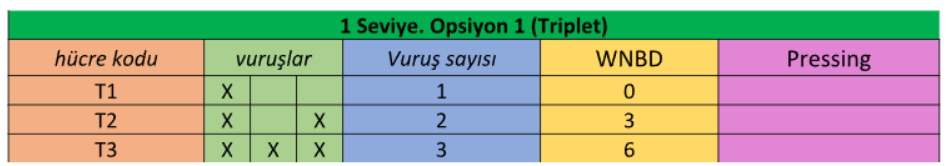

In [16]:
level_1B_f = np.array([['Level1B',1, 0 , 0 , 0 ] , ['Level1B',0, 0, 1 , 0], ['Level1B',1 ,0 ,1, 0], 
                      ['Level1B',1 ,0 ,1, 1] , ['Level1B',1 ,1 ,1, 0], ['Level1B',1 ,1 ,1, 1]])
df_fourth_1B = pd.DataFrame(level_1B_f, columns = ['Level','Straight-1','Straight-2','Straight-3','Straight-4'], 
                           index = ['S1', 'S2', 'S3', 'S4' , 'S5', 'S6'])
df_fourth_1B['Cell'] = df_fourth_1B.index
df_fourth_1B['Straight-1'] = df_fourth_1B['Straight-1'].astype(int)
df_fourth_1B['Straight-2'] = df_fourth_1B['Straight-2'].astype(int)
df_fourth_1B['Straight-3'] = df_fourth_1B['Straight-3'].astype(int)
df_fourth_1B['Straight-4'] = df_fourth_1B['Straight-4'].astype(int)
df_fourth_1B['Q'] = df_fourth_1B['Straight-1']+df_fourth_1B['Straight-2']+df_fourth_1B['Straight-3']+df_fourth_1B['Straight-4']
df_fourth_1B['WNBD'] = [0 , 2 , 2 , 6, 6 , 10 ]
df_fourth_1B['Pressing'] = [0 , 5.5 ,1 , 5.5, 1 , 1]
df_fourth_1B

,Level,Straight-1,Straight-2,Straight-3,Straight-4,Cell,Q,WNBD,Pressing
S1,Level1B,1,0,0,0,S1,1,0,0.0
S2,Level1B,0,0,1,0,S2,1,2,5.5
S3,Level1B,1,0,1,0,S3,2,2,1.0
S4,Level1B,1,0,1,1,S4,3,6,5.5
S5,Level1B,1,1,1,0,S5,3,6,1.0
S6,Level1B,1,1,1,1,S6,4,10,1.0


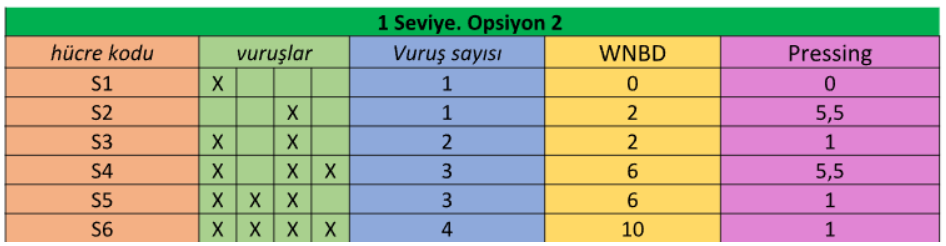

In [18]:
level_2A_t = np.array([['Level2A', 1 , 0 , 0] , ['Level2A',1, 0, 1] , ['Level2A',1 ,1 ,1] , ['Level2A',1 ,1 ,0] ,
                      ['Level2A', 0 , 1 , 0] , ['Level2A',0, 1, 1] , ['Level2A',0 ,0 ,1]])
df_triplet_2A = pd.DataFrame(level_2A_t, columns = ['Level','Triplet-1','Triplet-2','Triplet-3'], index = ['T1', 'T2', 'T3','T4', 'T5', 'T6','T7'])
df_triplet_2A['Cell'] = df_triplet_2A.index
df_triplet_2A['Triplet-1'] = df_triplet_2A['Triplet-1'].astype(int)
df_triplet_2A['Triplet-2'] = df_triplet_2A['Triplet-2'].astype(int)
df_triplet_2A['Triplet-3'] = df_triplet_2A['Triplet-3'].astype(int)
df_triplet_2A['Q'] = df_triplet_2A['Triplet-1']+ df_triplet_2A['Triplet-2'] + df_triplet_2A['Triplet-3']
df_triplet_2A['WNBD'] = [0 , 3 , 6, 3, 3, 6, 3]
df_triplet_2A['Pressing'] = ["" , "" , "", "" , "" , "" , ""]
df_triplet_2A

,Level,Triplet-1,Triplet-2,Triplet-3,Cell,Q,WNBD,Pressing
T1,Level2A,1,0,0,T1,1,0,
T2,Level2A,1,0,1,T2,2,3,
T3,Level2A,1,1,1,T3,3,6,
T4,Level2A,1,1,0,T4,2,3,
T5,Level2A,0,1,0,T5,1,3,
T6,Level2A,0,1,1,T6,2,6,
T7,Level2A,0,0,1,T7,1,3,


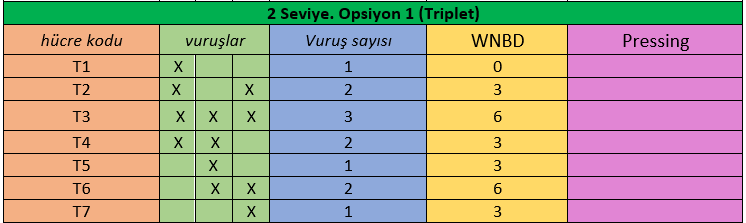

In [23]:
level_2B_f = np.array([['Level2B', 1, 0, 0, 0], ['Level2B', 0, 0, 1, 0], ['Level2B', 1, 0, 1, 0], ['Level2B', 1, 0, 1, 1],
                      ['Level2B', 1, 1, 1, 0], ['Level2B', 1, 1, 1, 1], ['Level2B', 1, 0, 0, 1], 
                      ['Level2B', 0, 1, 1, 0], ['Level2B', 0, 1, 0, 1], ['Level2B', 0, 0, 1, 1], ['Level2B', 1, 1, 0, 0],
                      ['Level2B', 1, 1, 0, 1], ['Level2B', 0, 0, 0, 1], ['Level2B', 0, 1, 0, 0]])

df_fourth_2B = pd.DataFrame(level_2B_f, columns = ['Level','Straight-1','Straight-2','Straight-3','Straight-4'], 
                           index = ['S1', 'S2', 'S3', 'S4' , 'S5', 'S6', 'S7',
                                    'S8', 'S9', 'S10', 'S11' , 'S12', 'S13', 'S14'])
df_fourth_2B['Cell'] = df_fourth_2B.index
df_fourth_2B['Straight-1'] = df_fourth_2B['Straight-1'].astype(int)
df_fourth_2B['Straight-2'] = df_fourth_2B['Straight-2'].astype(int)
df_fourth_2B['Straight-3'] = df_fourth_2B['Straight-3'].astype(int)
df_fourth_2B['Straight-4'] = df_fourth_2B['Straight-4'].astype(int)
df_fourth_2B['Q'] = df_fourth_2B['Straight-1']+df_fourth_2B['Straight-2']+df_fourth_2B['Straight-3']+df_fourth_2B['Straight-4']
df_fourth_2B['WNBD'] = [0 , 2 , 2 , 6, 6 , 10, 4, 6, 8, 6, 4, 8 , 4 , 4]
df_fourth_2B['Pressing'] = [0 , 5.5 ,1 , 1, 1 , 1, 4.5, 6.5, 10, 5.5, 2.5, 4.5, 7.5, 7.5 ]
df_fourth_2B

,Level,Straight-1,Straight-2,Straight-3,Straight-4,Cell,Q,WNBD,Pressing
S1,Level2B,1,0,0,0,S1,1,0,0.0
S2,Level2B,0,0,1,0,S2,1,2,5.5
S3,Level2B,1,0,1,0,S3,2,2,1.0
S4,Level2B,1,0,1,1,S4,3,6,1.0
S5,Level2B,1,1,1,0,S5,3,6,1.0
S6,Level2B,1,1,1,1,S6,4,10,1.0
S7,Level2B,1,0,0,1,S7,2,4,4.5
S8,Level2B,0,1,1,0,S8,2,6,6.5
S9,Level2B,0,1,0,1,S9,2,8,10.0
S10,Level2B,0,0,1,1,S10,2,6,5.5


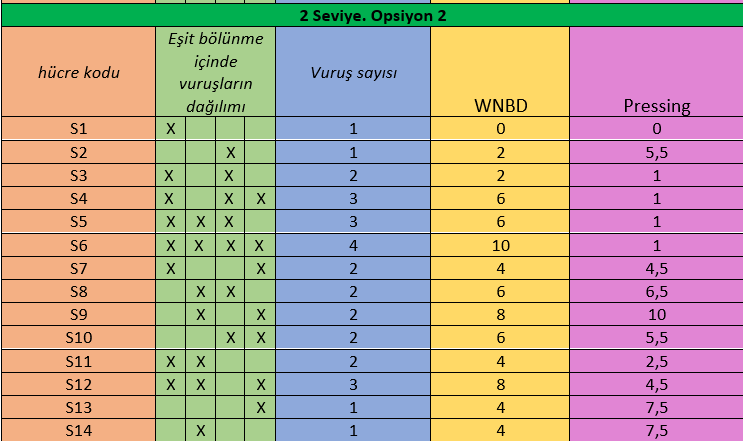

### Music21 librarysi kullanılarak oluşturulacak skorlardaki vuruşlar ve esler (farklı uzunluklar) için tanımlanır 

In [22]:
t = note.Note('B4')
t.duration = duration.Duration(1.0/3.0)


tt = note.Note('B4')
tt.duration = duration.Duration(2.0/3.0)


qes = note.Rest()
qes.duration.type = 'quarter'

q = note.Note('B4')
q.duration.type = 'quarter'

eight = note.Note('B4')
eight.duration = duration.Duration(0.5)

qdot = note.Note('B4')
qdot.duration = duration.Duration(0.75/1)

eightdot = note.Note('B4')
eightdot.duration = duration.Duration(0.75)

eightdotes = note.Rest()
eightdotes.duration = duration.Duration(0.75)

qesdot = note.Rest()
qesdot.duration = duration.Duration(0.75/1)

eightes = note.Rest()
eightes.duration = duration.Duration(0.5)

sixteenthes = note.Rest()
sixteenthes.duration = duration.Duration(0.25)

tripletes = note.Rest()
tripletes.duration = duration.Duration(1.0/3.0)
#tripletes.duration.tuplets[0].tupletNormalShow = 'number'

tripleteses = note.Rest()
tripleteses.duration = duration.Duration(2.0/3.0)
#tripleteses.duration.tuplets[0].tupletNormalShow = 'number'

sixteenth = note.Note('B4')
sixteenth.duration = duration.Duration(0.25)


In [ ]:
'''seviye = 0
while not((seviye==1) or (seviye==2)):
    seviye = int(input("Seviye Belirleyin (1-2):"))

opsiyon = 0
while not((opsiyon==1) or (opsiyon==2) ):
    opsiyon = int(input("Opsiyon Belirleyin (1-2):"))
    
olcu_sayisi = 2
zaman_isareti = 4

#olcu_sayisi = 0
#while not((olcu_sayisi==1) or (olcu_sayisi==2)):
#    olcu_sayisi = int(input("Ölçü Sayısını Belirleyin (1-2):"))
    
#zaman_isareti = 0    
#while not((zaman_isareti==2) or (zaman_isareti==3) or (zaman_isareti==4) or (zaman_isareti==5)):
#    zaman_isareti = int(input("Zaman İşareti Belirleyin (2-5):"))
 '''

'seviye = 0\nwhile not((seviye==1) or (seviye==2)):\n    seviye = int(input("Seviye Belirleyin (1-2):"))\n\nopsiyon = 0\nwhile not((opsiyon==1) or (opsiyon==2) ):\n    opsiyon = int(input("Opsiyon Belirleyin (1-2):"))\n    \nolcu_sayisi = 2\nzaman_isareti = 4\n\n#olcu_sayisi = 0\n#while not((olcu_sayisi==1) or (olcu_sayisi==2)):\n#    olcu_sayisi = int(input("Ölçü Sayısını Belirleyin (1-2):"))\n    \n#zaman_isareti = 0    \n#while not((zaman_isareti==2) or (zaman_isareti==3) or (zaman_isareti==4) or (zaman_isareti==5)):\n#    zaman_isareti = int(input("Zaman İşareti Belirleyin (2-5):"))\n '

### Ritm oluşturma yönergesinde tanımlanan formül

In [24]:
#calculateritm(seviye=1, opsiyon=2, olcu_sayisi=2,zaman_isareti=4)

In [25]:
def calculateritm(seviye, opsiyon, olcu_sayisi,zaman_isareti):
    
    if (seviye==1 and opsiyon==1):
        my_ritmtable = df_triplet_1A
        ritim_table = 0
    elif (seviye==1 and opsiyon==2):
        my_ritmtable = df_fourth_1B
        ritim_table = 1
    elif (seviye==2 and opsiyon==1):
        my_ritmtable = df_triplet_2A
        ritim_table = 0
    elif (seviye==2 and opsiyon==2):
        my_ritmtable = df_fourth_2B
        ritim_table = 1
    
    

    olcu_zamani = zaman_isareti
    zorluk_derecesi_ust = 15
    zorluk_derecesi_alt = 9
    toplam_olcu = olcu_sayisi * olcu_zamani    
    final_ritm_count = 3
        
    deneme  = 0
    Q_total = 0
    ritm_count = 1 

    
    
    while ((Q_total>=zorluk_derecesi_ust or Q_total<=zorluk_derecesi_alt) or final_ritm_count>=3):
        
        final_ritm_count = 0
        Q_total = 0 
        ritm_count = 1 
        deneme +=1
        my_ritim = ""
        my_ritim_list = []
        temp_ritm ="";
        for i in range(toplam_olcu):
            if (ritim_table==0):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 4])
                Q_total += my_ritmtable.iat[ritim, 5]
                if (temp_ritm==my_ritmtable.iat[ritim, 4]):
                    ritm_count +=1
                    if ritm_count>=final_ritm_count:
                        final_ritm_count = ritm_count
                else:
                    ritm_count = 1
                    temp_ritm = my_ritmtable.iat[ritim, 4]
                #print(temp_ritm + " " + "Ritm Count " + str(ritm_count) + " Final Ritm Count: " + str(final_ritm_count))
            elif (ritim_table==1):  
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 5])
                Q_total += my_ritmtable.iat[ritim, 6]
                if (temp_ritm==my_ritmtable.iat[ritim, 5]):
                    ritm_count +=1
                    if(ritm_count>=final_ritm_count):
                      final_ritm_count = ritm_count  
                else:
                    ritm_count = 1
                    #if final_ritm_count<ritm_count:
                    #    final_ritm_count = ritm_count    
                    temp_ritm = my_ritmtable.iat[ritim, 5]
                #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            
        #print("final ritm count", final_ritm_count )
           
        
    #print("Q2  :", Q_total)     
    #print("Ritim: ", my_ritim)
    #print("my_ritm", my_ritim)
    #print("Ritim List: ", my_ritim_list)

    
    return my_ritim_list

In [26]:
def firstbeatcontrol(seviye, opsiyon, ritim_list_tbc):
    if (seviye==1 and (ritim_list_tbc[0]=="S2")):
        first_beat = True
    elif (seviye==2 and opsiyon==1 and (ritim_list_tbc[0]=="T2" or ritim_list_tbc[0]=="T3" or ritim_list_tbc[0]=="T6")):
        first_beat = True
    elif (seviye==2 and opsiyon==2 and (ritim_list_tbc[0]=="S2" or ritim_list_tbc[0]=="S3" or ritim_list_tbc[0]=="S4" or ritim_list_tbc[0]=="S8" or ritim_list_tbc[0]=="S9" or ritim_list_tbc[0]=="S10")):
        first_beat = True        
    else:
        first_beat = False
     
    return first_beat

### Oluşturulan ritmi skora çeviren fonksiyon.

In [27]:
def writescore(my_ritim_list, seviye, opsiyon, olcu_sayisi, zaman_isareti, req_tempo):
    s = stream.Stream()
    
    #print("Ritm", my_ritim_list)
    my_tempo = tempo.MetronomeMark(number = req_tempo)
    s.insert(0, my_tempo)
    olcu_zamani = zaman_isareti
    toplam_olcu = olcu_sayisi * olcu_zamani 
    #print(toplam_olcu)
    note_count = 0
    if (seviye==1):
        for i in range(toplam_olcu):
            if (my_ritim_list[i] == "T3"):
                #print("NC", note_count)
                s.repeatAppend(t, 3)
                s.notes[note_count].duration.tuplets[0].type = 'start'
                s.notes[note_count+2].duration.tuplets[0].type = 'stop'
                note_count = note_count + 3
            elif (my_ritim_list[i] == "T2"):    
                #print("NC", note_count)
                s.repeatAppend(tt, 1)
                s.repeatAppend(t, 1)
                s.notes[note_count].duration.tuplets[0].type = 'start'
                s.notes[note_count+1].duration.tuplets[0].type = 'stop'
                note_count = note_count + 2
            elif (my_ritim_list[i] == "T1"):    
                s.repeatAppend(q, 1)
                note_count = note_count + 1
            elif (my_ritim_list[i] == "S1"):
                s.repeatAppend(q, 1)
            elif (my_ritim_list[i] == "S2"):
                s.repeatAppend(eightes, 1) 
                s.repeatAppend(eight, 1)
            elif (my_ritim_list[i] == "S3"):
                s.repeatAppend(eight, 2) 
            elif (my_ritim_list[i] == "S4"):
                s.repeatAppend(eight, 1)
                s.repeatAppend(sixteenth, 2)
            elif (my_ritim_list[i] == "S5"):
                s.repeatAppend(sixteenth, 2)    
                s.repeatAppend(eight, 1)
            elif (my_ritim_list[i] == "S6"):
                s.repeatAppend(sixteenth, 4)
    else:
        for i in range(toplam_olcu):
            if (my_ritim_list[i] == "T7"):
                #print("NC-T7", note_count)
                s.repeatAppend(t, 3)
                s.notes[note_count].duration.tuplets[0].type = 'start'
                s.notes[note_count+2].duration.tuplets[0].type = 'stop'
                note_count = note_count + 3
            elif (my_ritim_list[i] == "T5"): 
                #print("NC-T5", note_count)   
                s.repeatAppend(tt, 1)
                s.repeatAppend(t, 1)
                s.notes[note_count].duration.tuplets[0].type = 'start'
                s.notes[note_count+1].duration.tuplets[0].type = 'stop'
                note_count = note_count + 2
            elif (my_ritim_list[i] == "T1"):
                #print("NC-T1", note_count)    
                s.repeatAppend(q, 1)
                note_count = note_count + 1
            elif (my_ritim_list[i] == "T2"): 
                #print("NC-T2", note_count)  
                s.repeatAppend(tripletes, 1)    
                s.repeatAppend(tt, 1)
                s.notes[note_count].duration.tuplets[0].type = 'start'
                s.notes[note_count].duration.tuplets[0].type = 'stop'
                note_count = note_count + 1
            elif (my_ritim_list[i] == "T3"): 
                #print("NC-T3", note_count)   
                s.repeatAppend(tripleteses, 1)
                s.repeatAppend(t, 1) 
                s.notes[note_count].duration.tuplets[0].type = 'start'
                s.notes[note_count].duration.tuplets[0].type = 'stop'
                note_count = note_count + 1   
            elif (my_ritim_list[i] == "T4"):    
                #print("NC-T4", note_count) 
                s.repeatAppend(t, 1)
                s.repeatAppend(tt, 1)
                s.notes[note_count].duration.tuplets[0].type = 'start'
                s.notes[note_count+1].duration.tuplets[0].type = 'stop'
                note_count = note_count + 2
            elif (my_ritim_list[i] == "T6"):
                #print("NC-T6", note_count)    
                s.repeatAppend(tripletes, 1)
                s.repeatAppend(t, 2)   
                #s.notes[note_count].duration.tuplets[0].type = 'start'
                #s.notes[note_count+1].duration.tuplets[0].type = 'stop' 
                note_count = note_count + 2
            elif (my_ritim_list[i] == "S1"):
                s.repeatAppend(q, 1)
            elif (my_ritim_list[i] == "S2"):
                s.repeatAppend(eightes, 1) 
                s.repeatAppend(eight, 1)
            elif (my_ritim_list[i] == "S6"):
                s.repeatAppend(eight, 2) 
            elif (my_ritim_list[i] == "S13"):
                s.repeatAppend(eight, 1)
                s.repeatAppend(sixteenth, 2)
            elif (my_ritim_list[i] == "S11"):
                s.repeatAppend(sixteenth, 2)    
                s.repeatAppend(eight, 1)
            elif (my_ritim_list[i] == "S14"):
                s.repeatAppend(sixteenth, 4)
            elif (my_ritim_list[i] == "S3"):
                s.repeatAppend(sixteenthes, 1)
                s.repeatAppend(eightdot, 1)
            elif (my_ritim_list[i] == "S4"):
                s.repeatAppend(eightdotes, 1) 
                s.repeatAppend(sixteenth, 1)
            elif (my_ritim_list[i] == "S5"):
                s.repeatAppend(sixteenth, 1)
                s.repeatAppend(eightdot, 1) 
            elif (my_ritim_list[i] == "S7"):
                s.repeatAppend(eightdot, 1)
                s.repeatAppend(sixteenth, 1)
            elif (my_ritim_list[i] == "S8"):
                s.repeatAppend(sixteenthes, 1)
                s.repeatAppend(sixteenth, 1)
                s.repeatAppend(eight, 1)
            elif (my_ritim_list[i] == "S9"):
                s.repeatAppend(sixteenthes, 1)
                s.repeatAppend(eight, 1)
                s.repeatAppend(sixteenth, 1)    
            elif (my_ritim_list[i] == "S10"):
                s.repeatAppend(eightes, 1) 
                s.repeatAppend(sixteenth, 2)
            elif (my_ritim_list[i] == "S12"):
                s.repeatAppend(sixteenth, 1) 
                s.repeatAppend(eight, 1)
                s.repeatAppend(sixteenth, 1)
    
    #print("Note_count", note_count)

    '''
    if zaman_isareti==2:
        s.insert(0, meter.TimeSignature('2/4'))
    elif zaman_isareti==3:
        s.insert(0, meter.TimeSignature('3/4'))
    elif zaman_isareti==4:
        s.insert(0, meter.TimeSignature('4/4'))
    elif zaman_isareti==5:
        s.insert(0, meter.TimeSignature('5/4'))
    '''
    s.insert(0, meter.TimeSignature('4/4'))
    
    s.show()
    #pngfile_name = f"png_seviye10_opsiyon10.png"
    #s.write("musicxml.pdf", fp="wheretosavethefile.pdf")

    #print(my_ritim_list)
       
  
    return s


In [28]:
'''

#my_ritm_list = ['T1', 'T2', 'T3', 'T1', 'T1', 'T2', 'T3', 'T2']
my_ritm_list = ['T7', 'T6', 'T4', 'T2', 'T3', 'T1', 'T7', 'T1']
writescore(my_ritm_list, seviye=2, opsiyon=1, olcu_sayisi=2, zaman_isareti=4, req_tempo=70);

mf = midi.translate.streamToMidiFile(s)
#mf.ticksPerQuarterNote = 512
midifile_name = f"midi_seviye10_opsiyon10.mid"
mf.open(midifile_name, 'wb')
mf.write()
mf.close()
'''

'\n\n#my_ritm_list = [\'T1\', \'T2\', \'T3\', \'T1\', \'T1\', \'T2\', \'T3\', \'T2\']\nmy_ritm_list = [\'T7\', \'T6\', \'T4\', \'T2\', \'T3\', \'T1\', \'T7\', \'T1\']\nwritescore(my_ritm_list, seviye=2, opsiyon=1, olcu_sayisi=2, zaman_isareti=4, req_tempo=70);\n\nmf = midi.translate.streamToMidiFile(s)\n#mf.ticksPerQuarterNote = 512\nmidifile_name = f"midi_seviye10_opsiyon10.mid"\nmf.open(midifile_name, \'wb\')\nmf.write()\nmf.close()\n'

In [29]:
'''
,s = stream.Stream()
n = note.Note()

n.duration = duration.Duration(1.0/3.0)

s.repeatAppend(n, 3)

s.repeatAppend(tt, 1)
s.repeatAppend(n, 1)

s.repeatAppend(t, 3)

s.repeatAppend(q, 1)

s.repeatAppend(q, 1)

s.repeatAppend(tt, 1)
s.repeatAppend(t, 1)

s.repeatAppend(tripletes, 1)    
s.repeatAppend(tt, 1)

s.notes[0].duration.tuplets[0].type = 'start'
s.notes[2].duration.tuplets[0].type = 'stop'
s.notes[3].duration.tuplets[0].type = 'start'
s.notes[4].duration.tuplets[0].type = 'stop'
s.notes[5].duration.tuplets[0].type = 'start'
s.notes[7].duration.tuplets[0].type = 'stop'
s.notes[10].duration.tuplets[0].type = 'start'
s.notes[11].duration.tuplets[0].type = 'stop'
s.notes[12].duration.tuplets[0].type = 'start'
s.notes[12].duration.tuplets[0].type = 'stop'



s.insert(0, meter.TimeSignature('4/4'));
s.show()
'''

"\n,s = stream.Stream()\nn = note.Note()\n\nn.duration = duration.Duration(1.0/3.0)\n\ns.repeatAppend(n, 3)\n\ns.repeatAppend(tt, 1)\ns.repeatAppend(n, 1)\n\ns.repeatAppend(t, 3)\n\ns.repeatAppend(q, 1)\n\ns.repeatAppend(q, 1)\n\ns.repeatAppend(tt, 1)\ns.repeatAppend(t, 1)\n\ns.repeatAppend(tripletes, 1)    \ns.repeatAppend(tt, 1)\n\ns.notes[0].duration.tuplets[0].type = 'start'\ns.notes[2].duration.tuplets[0].type = 'stop'\ns.notes[3].duration.tuplets[0].type = 'start'\ns.notes[4].duration.tuplets[0].type = 'stop'\ns.notes[5].duration.tuplets[0].type = 'start'\ns.notes[7].duration.tuplets[0].type = 'stop'\ns.notes[10].duration.tuplets[0].type = 'start'\ns.notes[11].duration.tuplets[0].type = 'stop'\ns.notes[12].duration.tuplets[0].type = 'start'\ns.notes[12].duration.tuplets[0].type = 'stop'\n\n\n\ns.insert(0, meter.TimeSignature('4/4'));\ns.show()\n"

In [30]:
'''
s = stream.Stream()
s.repeatAppend(note.Note(), 4)

t32h = duration.Tuplet(3, 2, 'half')
t54q = duration.Tuplet(5, 4, 'quarter')
n1 = note.Note()
n1.duration.type = 'half'
n1.duration.appendTuplet(copy.deepcopy(t32h))
s.append(n1)
for i in range(5):
    n = note.Note(61 + i)
    n.duration.type = 'quarter'
    n.duration.appendTuplet(copy.deepcopy(t32h))
    n.duration.appendTuplet(copy.deepcopy(t54q))
    s.append(n)
s.notes[4].duration.tuplets[0].type = 'start'
s.notes[5].duration.tuplets[1].type = 'start'
s.notes[-1].duration.tuplets[0].type = 'stop'
s.notes[-1].duration.tuplets[1].type = 'stop'

s.show();
'''

"\ns = stream.Stream()\ns.repeatAppend(note.Note(), 4)\n\nt32h = duration.Tuplet(3, 2, 'half')\nt54q = duration.Tuplet(5, 4, 'quarter')\nn1 = note.Note()\nn1.duration.type = 'half'\nn1.duration.appendTuplet(copy.deepcopy(t32h))\ns.append(n1)\nfor i in range(5):\n    n = note.Note(61 + i)\n    n.duration.type = 'quarter'\n    n.duration.appendTuplet(copy.deepcopy(t32h))\n    n.duration.appendTuplet(copy.deepcopy(t54q))\n    s.append(n)\ns.notes[4].duration.tuplets[0].type = 'start'\ns.notes[5].duration.tuplets[1].type = 'start'\ns.notes[-1].duration.tuplets[0].type = 'stop'\ns.notes[-1].duration.tuplets[1].type = 'stop'\n\ns.show();\n"

In [31]:
def table_scores(my_ritm_list, seviye, opsiyon):

  if (seviye==1 and opsiyon==1):
    my_ritmtable = df_triplet_1A
  elif (seviye==1 and opsiyon==2):
    my_ritmtable = df_fourth_1B
  elif (opsiyon==1):
    my_ritmtable = df_triplet_2A
  elif (opsiyon==2):
    my_ritmtable = df_fourth_2B


  table_Q = 0
  table_WNBD = 0
  if(opsiyon==2):
    table_Pressing = 0
  print(my_ritm_list)
  for i in range(len(my_ritm_list)):
    
    table_Q = table_Q + my_ritmtable.loc[my_ritm_list[i], "Q"]
    table_WNBD = table_WNBD + my_ritmtable.loc[my_ritm_list[i], "WNBD"] 
    if(opsiyon==2):
      table_Pressing = table_Pressing + my_ritmtable.loc[my_ritm_list[i], "Pressing"]
    else:
      table_Pressing = ""  
  print("Total Q: ", table_Q)
  print("Total WNBD: ", table_WNBD)
  print("Total Pressing: ", table_Pressing)
  print("Total WNBD/Q", "{:.2f}".format(table_WNBD/table_Q))
  return table_Q, table_WNBD, table_Pressing, table_WNBD/table_Q 

0 ['S8', 'S2', 'S13', 'S3', 'S4', 'S9', 'S1', 'S2']


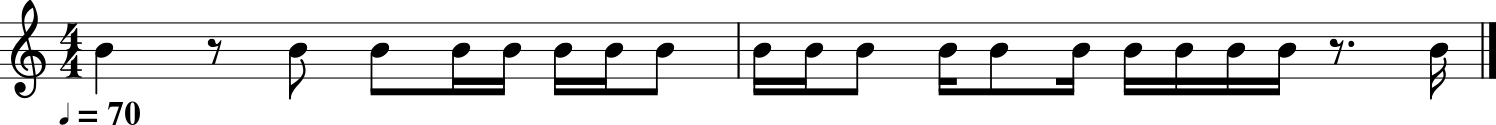

['S1', 'S2', 'S13', 'S11', 'S11', 'S12', 'S14', 'S4']
Total Q:  14
Total WNBD:  32
Total Pressing:  31.0
Total WNBD/Q 2.29
1 ['S12', 'S14', 'S3', 'S8', 'S13', 'S9', 'S13', 'S13']


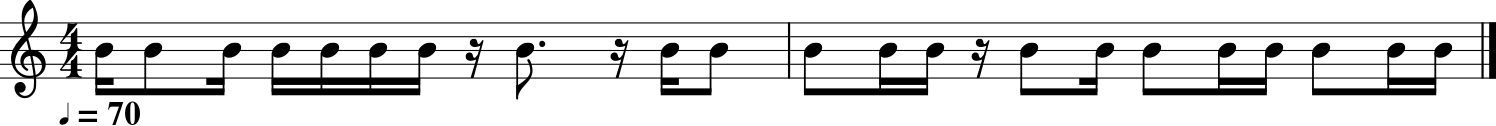

['S12', 'S14', 'S3', 'S8', 'S13', 'S9', 'S13', 'S13']
Total Q:  13
Total WNBD:  40
Total Pressing:  52.0
Total WNBD/Q 3.08
2 ['S1', 'S12', 'S11', 'S14', 'S14', 'S2', 'S7', 'S14']


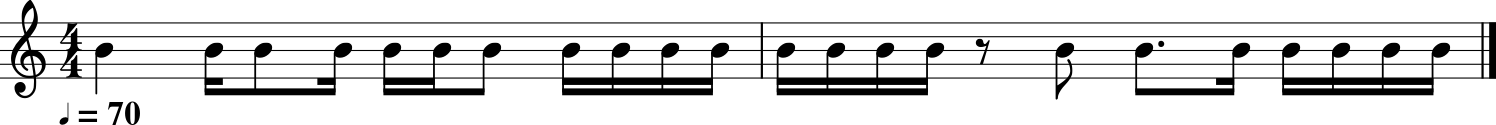

['S1', 'S12', 'S11', 'S14', 'S14', 'S2', 'S7', 'S14']
Total Q:  12
Total WNBD:  30
Total Pressing:  39.5
Total WNBD/Q 2.50
3 ['S14', 'S14', 'S1', 'S12', 'S9', 'S2', 'S9', 'S10']


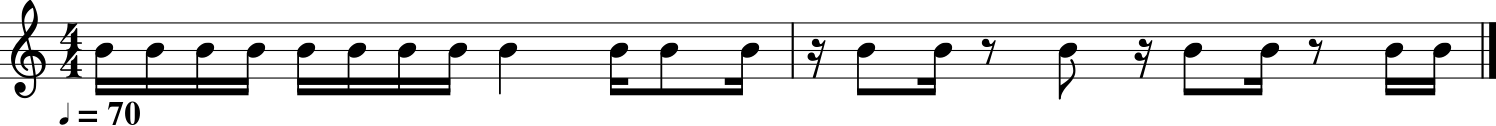

['S14', 'S14', 'S1', 'S12', 'S9', 'S2', 'S9', 'S10']
Total Q:  13
Total WNBD:  40
Total Pressing:  50.5
Total WNBD/Q 3.08
4 ['S6', 'S9', 'S3', 'S1', 'S2', 'S13', 'S9', 'S2']


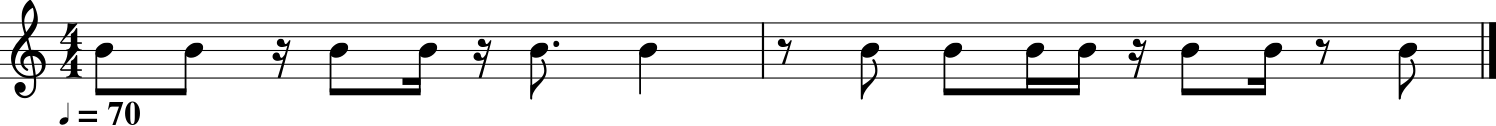

['S6', 'S9', 'S3', 'S1', 'S2', 'S13', 'S9', 'S2']
Total Q:  14
Total WNBD:  36
Total Pressing:  40.5
Total WNBD/Q 2.57
5 ['S4', 'S9', 'S3', 'S3', 'S9', 'S2', 'S1', 'S13']


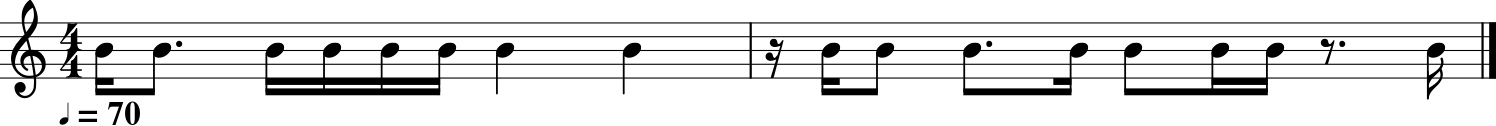

['S5', 'S14', 'S1', 'S1', 'S8', 'S7', 'S13', 'S4']
Total Q:  14
Total WNBD:  30
Total Pressing:  28.0
Total WNBD/Q 2.14
6 ['S8', 'S10', 'S8', 'S9', 'S2', 'S2', 'S1', 'S9']


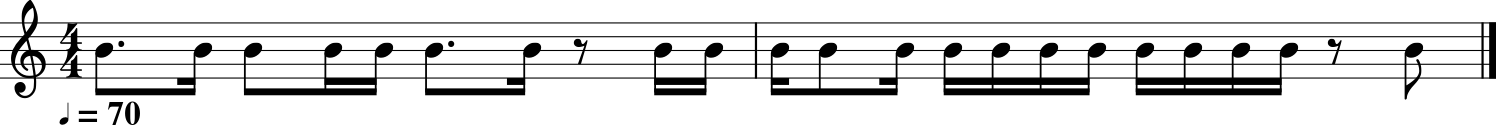

['S7', 'S13', 'S7', 'S10', 'S12', 'S14', 'S14', 'S2']
Total Q:  13
Total WNBD:  36
Total Pressing:  47.0
Total WNBD/Q 2.77
7 ['S8', 'S9', 'S10', 'S4', 'S2', 'S1', 'S2', 'S9']


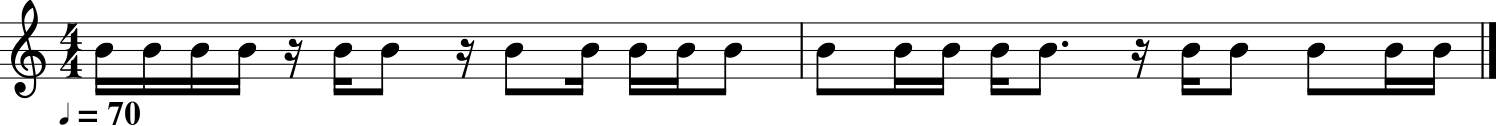

['S14', 'S8', 'S9', 'S11', 'S13', 'S5', 'S8', 'S13']
Total Q:  14
Total WNBD:  42
Total Pressing:  49.0
Total WNBD/Q 3.00
8 ['S1', 'S13', 'S1', 'S4', 'S7', 'S10', 'S2', 'S5']


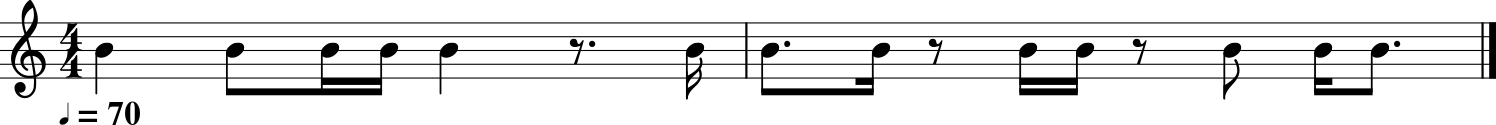

['S1', 'S13', 'S1', 'S4', 'S7', 'S10', 'S2', 'S5']
Total Q:  14
Total WNBD:  28
Total Pressing:  25.0
Total WNBD/Q 2.00
9 ['S6', 'S1', 'S7', 'S14', 'S13', 'S11', 'S7', 'S14']


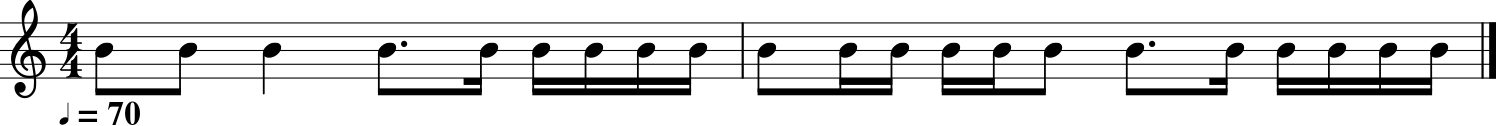

['S6', 'S1', 'S7', 'S14', 'S13', 'S11', 'S7', 'S14']
Total Q:  14
Total WNBD:  34
Total Pressing:  35.0
Total WNBD/Q 2.43
10 ['S14', 'S11', 'S13', 'S13', 'S7', 'S1', 'S11', 'S13']


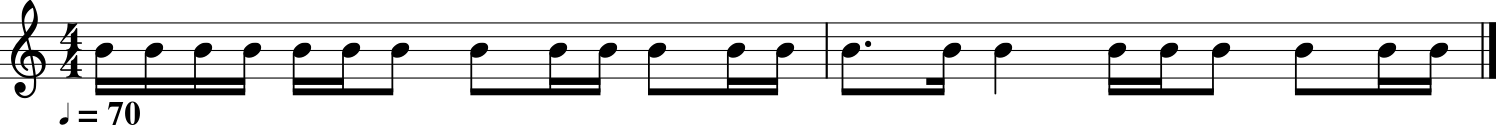

['S14', 'S11', 'S13', 'S13', 'S7', 'S1', 'S11', 'S13']
Total Q:  11
Total WNBD:  28
Total Pressing:  39.5
Total WNBD/Q 2.55
11 ['S13', 'S14', 'S14', 'S9', 'S7', 'S7', 'S8', 'S3']


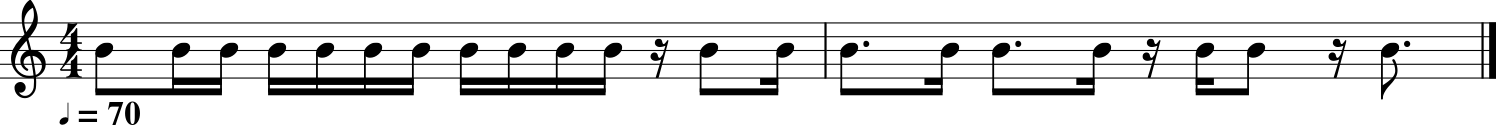

['S13', 'S14', 'S14', 'S9', 'S7', 'S7', 'S8', 'S3']
Total Q:  13
Total WNBD:  36
Total Pressing:  49.0
Total WNBD/Q 2.77
12 ['S9', 'S4', 'S13', 'S7', 'S13', 'S13', 'S1', 'S1']


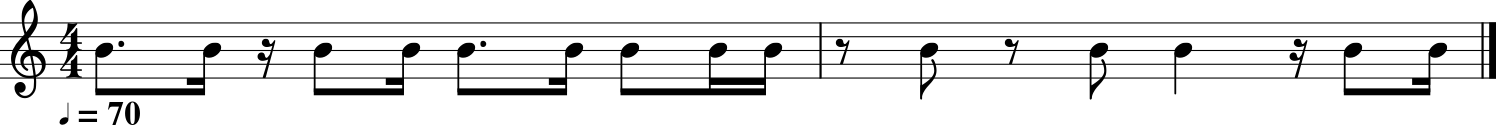

['S7', 'S9', 'S7', 'S13', 'S2', 'S2', 'S1', 'S9']
Total Q:  12
Total WNBD:  32
Total Pressing:  47.5
Total WNBD/Q 2.67
13 ['S3', 'S14', 'S14', 'S11', 'S10', 'S8', 'S14', 'S10']


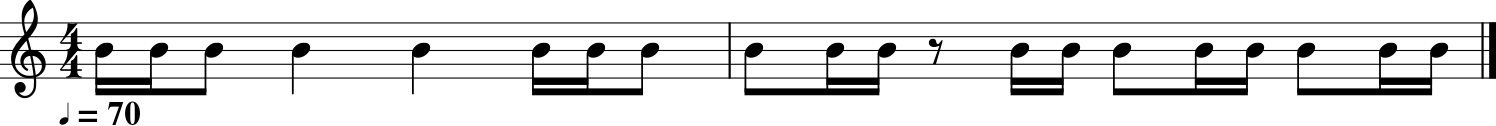

['S11', 'S1', 'S1', 'S11', 'S13', 'S10', 'S13', 'S13']
Total Q:  11
Total WNBD:  26
Total Pressing:  33.0
Total WNBD/Q 2.36
14 ['S7', 'S2', 'S1', 'S7', 'S9', 'S7', 'S1', 'S11']


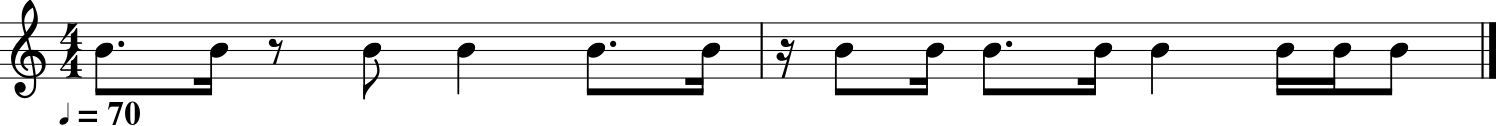

['S7', 'S2', 'S1', 'S7', 'S9', 'S7', 'S1', 'S11']
Total Q:  13
Total WNBD:  26
Total Pressing:  31.5
Total WNBD/Q 2.00
15 ['S1', 'S13', 'S12', 'S11', 'S13', 'S11', 'S10', 'S8']


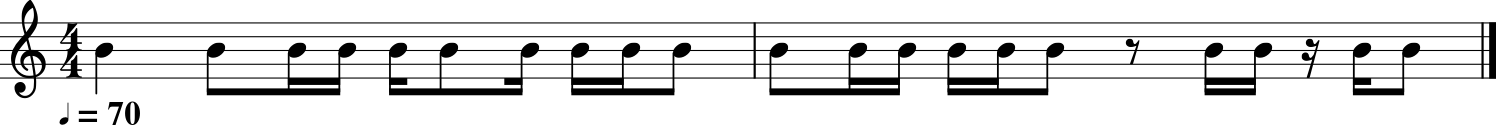

['S1', 'S13', 'S12', 'S11', 'S13', 'S11', 'S10', 'S8']
Total Q:  14
Total WNBD:  36
Total Pressing:  36.5
Total WNBD/Q 2.57
16 ['S13', 'S13', 'S10', 'S12', 'S12', 'S14', 'S9', 'S1']


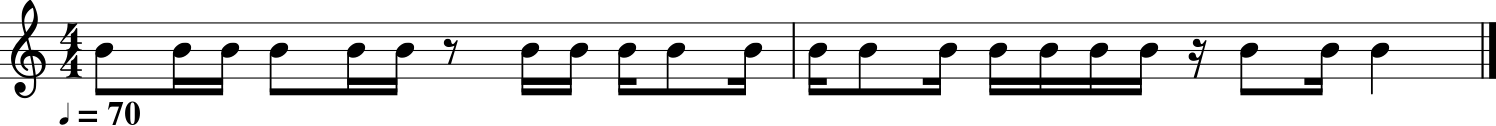

['S13', 'S13', 'S10', 'S12', 'S12', 'S14', 'S9', 'S1']
Total Q:  14
Total WNBD:  42
Total Pressing:  47.0
Total WNBD/Q 3.00
17 ['S2', 'S1', 'S9', 'S3', 'S12', 'S2', 'S1', 'S8']


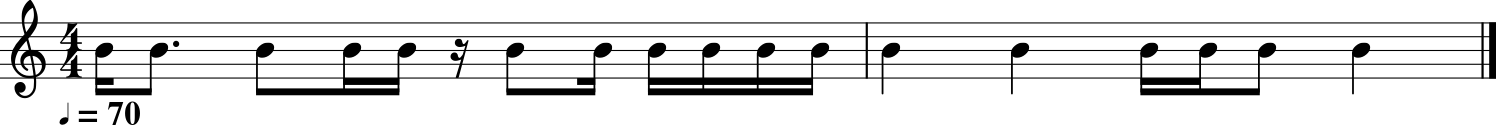

['S5', 'S13', 'S9', 'S14', 'S1', 'S1', 'S11', 'S1']
Total Q:  12
Total WNBD:  26
Total Pressing:  28.5
Total WNBD/Q 2.17
18 ['S9', 'S7', 'S11', 'S11', 'S3', 'S7', 'S13', 'S14']


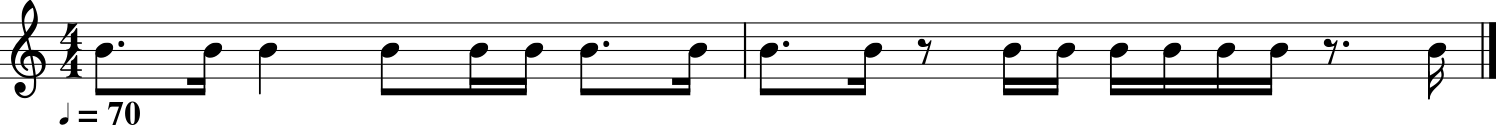

['S7', 'S1', 'S13', 'S7', 'S7', 'S10', 'S14', 'S4']
Total Q:  14
Total WNBD:  32
Total Pressing:  35.0
Total WNBD/Q 2.29
19 ['S13', 'S14', 'S10', 'S3', 'S9', 'S5', 'S14', 'S14']


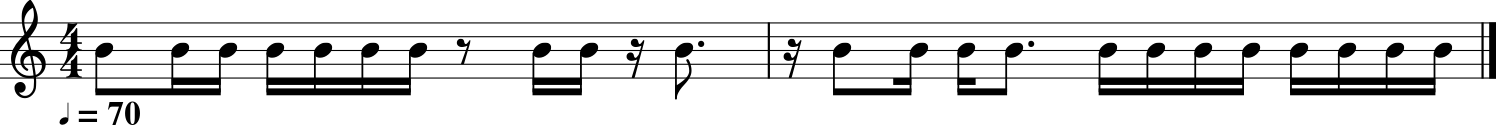

['S13', 'S14', 'S10', 'S3', 'S9', 'S5', 'S14', 'S14']
Total Q:  13
Total WNBD:  38
Total Pressing:  47.5
Total WNBD/Q 2.92
20 ['S3', 'S3', 'S10', 'S2', 'S12', 'S1', 'S10', 'S14']


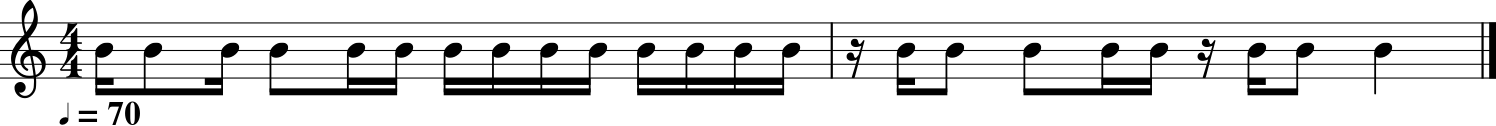

['S12', 'S13', 'S14', 'S14', 'S8', 'S13', 'S8', 'S1']
Total Q:  12
Total WNBD:  36
Total Pressing:  47.5
Total WNBD/Q 3.00
21 ['S5', 'S3', 'S14', 'S7', 'S8', 'S11', 'S13', 'S13']


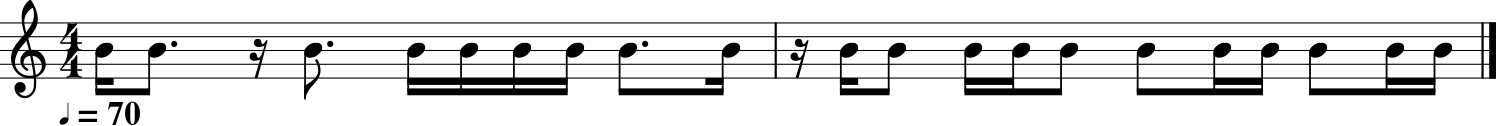

['S5', 'S3', 'S14', 'S7', 'S8', 'S11', 'S13', 'S13']
Total Q:  14
Total WNBD:  34
Total Pressing:  38.0
Total WNBD/Q 2.43
22 ['S4', 'S1', 'S4', 'S1', 'S2', 'S2', 'S14', 'S3']


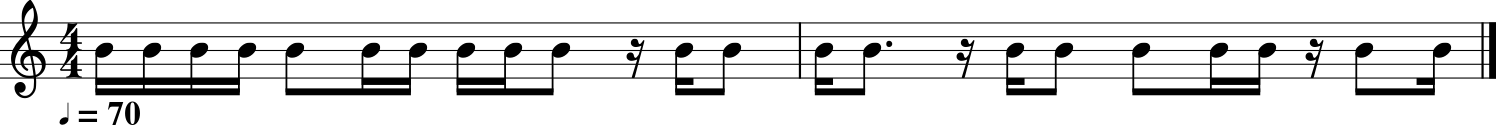

['S14', 'S13', 'S11', 'S8', 'S5', 'S8', 'S13', 'S9']
Total Q:  14
Total WNBD:  42
Total Pressing:  49.0
Total WNBD/Q 3.00
23 ['S7', 'S13', 'S1', 'S1', 'S12', 'S5', 'S10', 'S1']


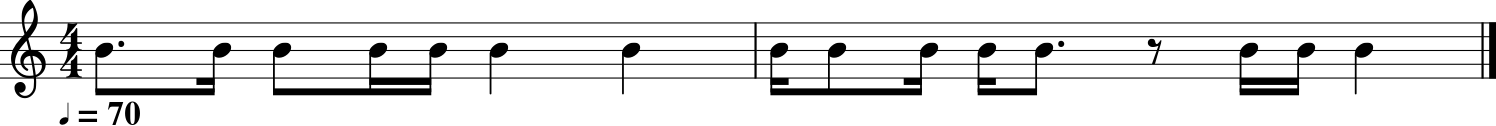

['S7', 'S13', 'S1', 'S1', 'S12', 'S5', 'S10', 'S1']
Total Q:  14
Total WNBD:  28
Total Pressing:  23.0
Total WNBD/Q 2.00
24 ['S11', 'S9', 'S3', 'S13', 'S14', 'S2', 'S13', 'S5']


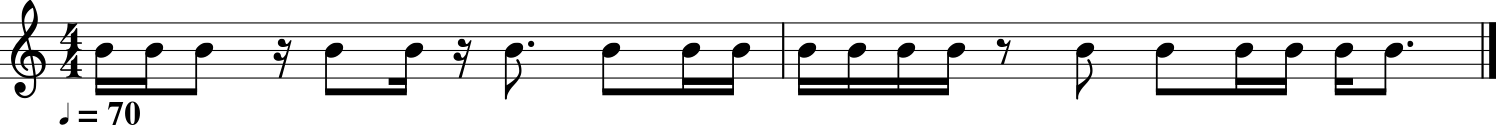

['S11', 'S9', 'S3', 'S13', 'S14', 'S2', 'S13', 'S5']
Total Q:  13
Total WNBD:  34
Total Pressing:  42.5
Total WNBD/Q 2.62
25 ['S9', 'S3', 'S14', 'S10', 'S14', 'S12', 'S1', 'S13']


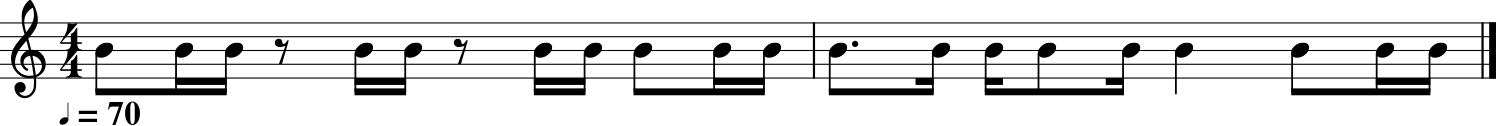

['S13', 'S10', 'S10', 'S13', 'S7', 'S12', 'S1', 'S13']
Total Q:  13
Total WNBD:  36
Total Pressing:  42.5
Total WNBD/Q 2.77
26 ['S8', 'S14', 'S13', 'S1', 'S2', 'S3', 'S2', 'S10']


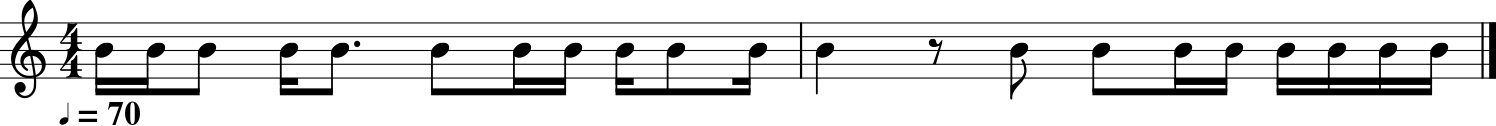

['S11', 'S5', 'S13', 'S12', 'S1', 'S2', 'S13', 'S14']
Total Q:  13
Total WNBD:  32
Total Pressing:  36.0
Total WNBD/Q 2.46
27 ['S8', 'S2', 'S2', 'S4', 'S9', 'S8', 'S1', 'S8']


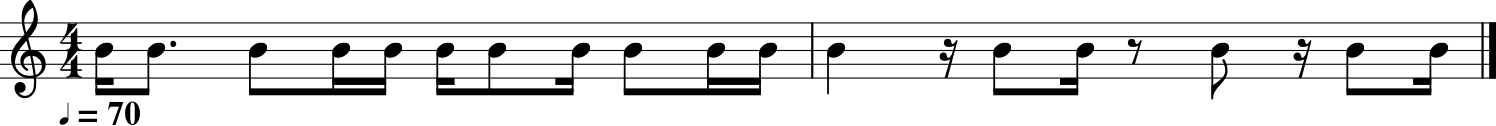

['S5', 'S13', 'S12', 'S13', 'S1', 'S9', 'S2', 'S9']
Total Q:  14
Total WNBD:  40
Total Pressing:  46.0
Total WNBD/Q 2.86
28 ['S7', 'S13', 'S5', 'S14', 'S8', 'S9', 'S10', 'S14']


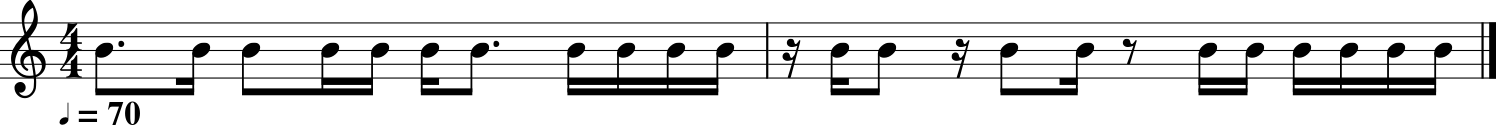

['S7', 'S13', 'S5', 'S14', 'S8', 'S9', 'S10', 'S14']
Total Q:  14
Total WNBD:  42
Total Pressing:  50.0
Total WNBD/Q 3.00
29 ['S10', 'S14', 'S12', 'S10', 'S14', 'S8', 'S14', 'S11']


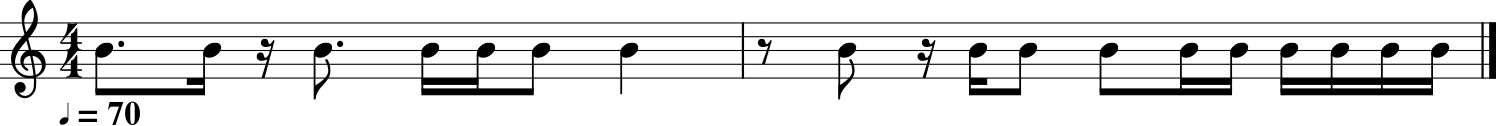

['S7', 'S3', 'S11', 'S1', 'S2', 'S8', 'S13', 'S14']
Total Q:  12
Total WNBD:  26
Total Pressing:  35.0
Total WNBD/Q 2.17


''

In [35]:
# Orjinal Çalışma



my_seviye = 2
my_opsiyon = 2
req_tempo = 70
olcu_sayisi = 2
zaman_isareti = 4

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 15)
#pdf.cell(200, 10, txt = f"Seviye: {seviye}, Opsiyon: {opsiyon}, Zaman Isareti: {zaman_isareti} ", ln = 1, align = 'C')
pdf.cell(200, 10, txt = f"Seviye: {my_seviye}, Opsiyon: {my_opsiyon}", ln = 1, align = 'C')

ritim_lists = []
ln = 1
number_of_samples = 30
for i in range(number_of_samples):
    ritim_list = calculateritm(my_seviye, my_opsiyon, olcu_sayisi, zaman_isareti)
    print(i, ritim_list)    
    first_beat = firstbeatcontrol(my_seviye, my_opsiyon, ritim_list)
    
    while (first_beat):
        ritim_list = calculateritm(my_seviye, my_opsiyon, olcu_sayisi, zaman_isareti)
        first_beat = firstbeatcontrol(my_seviye, my_opsiyon, ritim_list)
    
    ritim_lists.append(ritim_list)
    s = writescore(ritim_list,my_seviye, my_opsiyon, olcu_sayisi, zaman_isareti, req_tempo)
    #fname = f"ritm_seviye{seviye}_opsiyon{opsiyon}_zaman{zaman_isareti}_{i:0=2d}.pdf"
    fname = f"ritm_seviye{my_seviye}_opsiyon{my_opsiyon}_{i:0=2d}.pdf"
    s.write("musicxml.pdf", fp=fname) 
    sToStr = ' '.join([str(elem) for elem in ritim_list])
    table_Q, table_WNBD, table_Pressing, table_WNBDQratio  = table_scores(ritim_list,seviye=my_seviye, opsiyon=my_opsiyon)
    if (my_opsiyon==1):
      sToStr = sToStr + "   " + str(table_Q) + "   "  + str(table_WNBD) + "   " + str("{:.2f}".format(table_WNBD/table_Q)) 
    elif(my_opsiyon==2):
      sToStr = sToStr + "   " + str(table_Q) + "   "  + str(table_WNBD)  + "   " + str("{:.2f}".format(table_WNBD/table_Q))  +  "   " + str("{:.2f}".format(table_Pressing))



    ln +=1
    pdf.cell(200, 10, txt = sToStr, ln = ln, align = 'L')
    
    mf = midi.translate.streamToMidiFile(s)
    #mf.ticksPerQuarterNote = 512
    midifile_name = f"midi_seviye{my_seviye}_opsiyon{my_opsiyon}_{i:0=2d}.mid"
    mf.open(midifile_name, 'wb')
    mf.write()
    mf.close()
    
    #my_image = Image(str(s.write('lily.png'))) 
    #display(my_image)
    #pngfile_name = f"png_seviye{seviye}_opsiyon{opsiyon}_{i:0=2d}.png"
    
    #with open(pngfile_name, 'wb') as f:
    #    f.write(my_image.data)
    
fname_all = f"RitmAll_Seviye_{my_seviye}_Opsiyon_{my_opsiyon}_Listesi.pdf"   
pdf.output(fname_all)    


### Oluşturulan ritimler dosyaya yazar. Bu dosya diğer bir programda kullanılarak oluşturulan ritimler mp3 dosyasına çevrilecektir.

In [ ]:
#with open("ritm_list", "wb") as fp:   
#    pickle.dump(ritim_lists, fp)

In [ ]:
#with open("ritm_list", "rb") as frp:   
#    b = pickle.load(frp)
    


In [ ]:
#with open("song_meta", "wb") as fp:   #Pickling
#    pickle.dump([seviye, opsiyon, olcu_sayisi, zaman_isareti, req_tempo], fp)

In [ ]:
#with open("song_meta", "rb") as frp:   # Unpickling
#    b = pickle.load(frp)
    
#b    

In [36]:
'''def play(music, song_count):

  #mf = midi.translate.streamToMidiFile(music)
  #mf.ticksPerQuarterNote = 100   
  #midifile_name = "play_function.mid"
  #mf.open(midifile_name, 'wb')
  #mf.write()
  #mf.close()

  filename = music.write('mid')
  print("Filename", filename)
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 44100 > /dev/null
  #my_file = Audio(filename & ".wav")
  my_file = Audio(filename) 
  print("my_File", my_file)
  display(my_file)


  with open(f"wav_seviye{seviye}_opsiyon{opsiyon}_{song_count:0=2d}.wav", 'wb') as f:
    f.write(my_file.data)

  #files.download(f"wav_seviye{seviye}_opsiyon{opsiyon}_{song_count:0=2d}.wav")  

 '''   

'def play(music, song_count):\n\n  #mf = midi.translate.streamToMidiFile(music)\n  #mf.ticksPerQuarterNote = 100   \n  #midifile_name = "play_function.mid"\n  #mf.open(midifile_name, \'wb\')\n  #mf.write()\n  #mf.close()\n\n  filename = music.write(\'mid\')\n  print("Filename", filename)\n  !fluidsynth -ni font.sf2 $filename -F $filename\\.wav -r 44100 > /dev/null\n  #my_file = Audio(filename & ".wav")\n  my_file = Audio(filename) \n  print("my_File", my_file)\n  display(my_file)\n\n\n  with open(f"wav_seviye{seviye}_opsiyon{opsiyon}_{song_count:0=2d}.wav", \'wb\') as f:\n    f.write(my_file.data)\n\n  #files.download(f"wav_seviye{seviye}_opsiyon{opsiyon}_{song_count:0=2d}.wav")  \n\n '

In [37]:
'''def midi_wav(my_ritim_list, file_count, seviye):


 
  s = stream.Stream()
  my_tempo = tempo.MetronomeMark(number=req_tempo)
  s.insert(0, my_tempo)
  olcu_zamani = zaman_isareti
  toplam_olcu = olcu_sayisi * olcu_zamani

  if (seviye==1):
    for i in range(toplam_olcu):
        if (my_ritim_list[i] == "T3"):
            s.repeatAppend(t, 3)
        elif (my_ritim_list[i] == "T2"):    
            s.repeatAppend(tt, 1)
            s.repeatAppend(t, 1)
        elif (my_ritim_list[i] == "T1"):    
            s.repeatAppend(q, 1)
        elif (my_ritim_list[i] == "S1"):
            s.repeatAppend(q, 1)
        elif (my_ritim_list[i] == "S2"):
            s.repeatAppend(eigthes, 1) 
            s.repeatAppend(eigth, 1)
        elif (my_ritim_list[i] == "S3"):
            s.repeatAppend(eigth, 2) 
        elif (my_ritim_list[i] == "S4"):
            s.repeatAppend(eigth, 1)
            s.repeatAppend(sixteenth, 2)
        elif (my_ritim_list[i] == "S5"):
            s.repeatAppend(sixteenth, 2)    
            s.repeatAppend(eigth, 1)
        elif (my_ritim_list[i] == "S6"):
            s.repeatAppend(sixteenth, 4)
  else:
    for i in range(toplam_olcu):
        if (my_ritim_list[i] == "T7"):
            s.repeatAppend(t, 3)
        elif (my_ritim_list[i] == "T5"):     
            s.repeatAppend(tt, 1)
            s.repeatAppend(t, 1)
        elif (my_ritim_list[i] == "T1"):    
            s.repeatAppend(q, 1)
        elif (my_ritim_list[i] == "T2"):   
            s.repeatAppend(t, 1)    
            s.repeatAppend(tt, 1)
        elif (my_ritim_list[i] == "T3"):    
            s.repeatAppend(tripleteses, 1)
            s.repeatAppend(t, 1)    
        elif (my_ritim_list[i] == "T4"):     
            s.repeatAppend(t, 1)
            s.repeatAppend(tt, 1)
        elif (my_ritim_list[i] == "T6"):    
            s.repeatAppend(tripletes, 1)
            s.repeatAppend(tt, 1)    
        elif (my_ritim_list[i] == "S1"):
            s.repeatAppend(q, 1)
        elif (my_ritim_list[i] == "S2"):
            s.repeatAppend(eigthes, 1) 
            s.repeatAppend(eigth, 1)
        elif (my_ritim_list[i] == "S6"):
            s.repeatAppend(eigth, 2) 
        elif (my_ritim_list[i] == "S13"):
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(eigth, 1)
        elif (my_ritim_list[i] == "S11"):
            s.repeatAppend(eightdot, 1)    
            s.repeatAppend(sixteenthes, 1)
        elif (my_ritim_list[i] == "S14"):
            s.repeatAppend(sixteenth, 4)
        elif (my_ritim_list[i] == "S3"):
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(sixteenthes, 1) 
            s.repeatAppend(eigth, 1)
        elif (my_ritim_list[i] == "S4"):
            s.repeatAppend(qesdot, 1) 
            s.repeatAppend(sixteenth, 1)
        elif (my_ritim_list[i] == "S5"):
            s.repeatAppend(sixteenth, 2)
            s.repeatAppend(eigthes, 1) 
        elif (my_ritim_list[i] == "S7"):
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(eigthes, 1)
            s.repeatAppend(sixteenth, 1)
        elif (my_ritim_list[i] == "S8"):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(sixteenth, 2)
            s.repeatAppend(sixteenthes, 1)
        elif (my_ritim_list[i] == "S9"):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(sixteenth, 1)    
        elif (my_ritim_list[i] == "S9"):
            s.repeatAppend(eigthes, 1)
            s.repeatAppend(sixteenth, 2)    
        elif (my_ritim_list[i] == "S10"):
            s.repeatAppend(eigthes, 1) 
            s.repeatAppend(sixteenth, 2)
        elif (my_ritim_list[i] == "S12"):
            s.repeatAppend(eigth, 1) 
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(sixteenth, 1)
        

  #if zaman_isareti==2:
  #  s.insert(0, meter.TimeSignature('2/4'))
  #elif zaman_isareti==3:
  #  s.insert(0, meter.TimeSignature('3/4'))
  #elif zaman_isareti==4:
  #  s.insert(0, meter.TimeSignature('4/4'))
  #elif zaman_isareti==5:
  s.insert(0, meter.TimeSignature('5/4'))
    
  #show(s)    

  play(s, file_count)


  #print(my_ritim_list)



  #mf = midi.translate.streamToMidiFile(s)
  #mf.ticksPerQuarterNote = 100
  #mf.open('midi_wav_function.mid', 'wb')
  #mf.write()
  #mf.close()
  '''

'def midi_wav(my_ritim_list, file_count, seviye):\n\n\n \n  s = stream.Stream()\n  my_tempo = tempo.MetronomeMark(number=req_tempo)\n  s.insert(0, my_tempo)\n  olcu_zamani = zaman_isareti\n  toplam_olcu = olcu_sayisi * olcu_zamani\n\n  if (seviye==1):\n    for i in range(toplam_olcu):\n        if (my_ritim_list[i] == "T3"):\n            s.repeatAppend(t, 3)\n        elif (my_ritim_list[i] == "T2"):    \n            s.repeatAppend(tt, 1)\n            s.repeatAppend(t, 1)\n        elif (my_ritim_list[i] == "T1"):    \n            s.repeatAppend(q, 1)\n        elif (my_ritim_list[i] == "S1"):\n            s.repeatAppend(q, 1)\n        elif (my_ritim_list[i] == "S2"):\n            s.repeatAppend(eigthes, 1) \n            s.repeatAppend(eigth, 1)\n        elif (my_ritim_list[i] == "S3"):\n            s.repeatAppend(eigth, 2) \n        elif (my_ritim_list[i] == "S4"):\n            s.repeatAppend(eigth, 1)\n            s.repeatAppend(sixteenth, 2)\n        elif (my_ritim_list[i] == "S5"):\n  

### Mixed : Opsiyon 1.5

In [38]:
def firstbeatcontrolmixed(seviye, opsiyon, ritim_list_tbc,index):
    if (seviye==1 and (ritim_list_tbc[index]=="S2" or ritim_list_tbc[0]=="M2")):
        first_beat = True
    elif (seviye==2 and opsiyon==1 and (ritim_list_tbc[index]=="T2" or ritim_list_tbc[index]=="T3" or ritim_list_tbc[index]=="T6")):
        first_beat = True
    elif (seviye==2 and opsiyon==2 and (ritim_list_tbc[index]=="S2" or ritim_list_tbc[index]=="S3" or ritim_list_tbc[index]=="S4" or ritim_list_tbc[index]=="S8" or ritim_list_tbc[index]=="S9" or ritim_list_tbc[index]=="S10")):
        first_beat = True        
    else:
        first_beat = False
     
    return first_beat

In [39]:
def calculateritmseviyemixed(opsiyon):
    
    olcu_sayisi = 2
    zaman_isareti = 4
    
    olcu_zamani = zaman_isareti
    zorluk_derecesi_ust = 15
    zorluk_derecesi_alt = 9
    toplam_olcu = int(olcu_sayisi * olcu_zamani / 2)   
    final_ritm_count = 3
        
    deneme  = 0
    Q_total = 0
    ritm_count = 1 

    first_beat = False
    
    while ((Q_total>=zorluk_derecesi_ust or Q_total<=zorluk_derecesi_alt) or (final_ritm_count>=3) or first_beat):
        
        final_ritm_count = 0
        Q_total = 0 
        ritm_count = 1 
        deneme +=1
        my_ritim = ""
        my_ritim_list = []
        temp_ritm =""
        
        if opsiyon==1:
            my_ritmtable = df_triplet_1A
            ritim_table = 0
        if opsiyon==2:
            my_ritmtable = df_fourth_1B
            ritim_table = 1
        
                
        for i in range(toplam_olcu):
                      
            
            if (ritim_table==0):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 4])
                Q_total += my_ritmtable.iat[ritim, 5]
                if (temp_ritm==my_ritmtable.iat[ritim, 4]):
                    ritm_count +=1
                    if ritm_count>=final_ritm_count:
                      final_ritm_count = ritm_count
                else:
                    ritm_count = 1
                    #if final_ritm_count<ritm_count:
                    #    final_ritm_count = ritm_count
                    temp_ritm = my_ritmtable.iat[ritim, 4]
                    #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            elif (ritim_table==1):  
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 5])
                Q_total += my_ritmtable.iat[ritim, 6]
                if (temp_ritm==my_ritmtable.iat[ritim, 5]):
                    ritm_count +=1
                    if(ritm_count>=final_ritm_count):
                      final_ritm_count = ritm_count  
                else:
                    ritm_count = 1
                    #if final_ritm_count<ritm_count:
                    #    final_ritm_count = ritm_count    
                    temp_ritm = my_ritmtable.iat[ritim, 5]
                #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            

        
        
            
            
        if opsiyon==1:
            my_ritmtable = df_triplet_2A
            ritim_table = 0
        if opsiyon==2:
            my_ritmtable = df_fourth_2B
            ritim_table = 1
            
                
        for i in range(toplam_olcu):
                      
            
            if (ritim_table==0):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 4])
                Q_total += my_ritmtable.iat[ritim, 5]
                if (temp_ritm==my_ritmtable.iat[ritim, 4]):
                    ritm_count +=1
                    if ritm_count>=final_ritm_count:
                      final_ritm_count = ritm_count
                else:
                    ritm_count = 1
                    #if final_ritm_count<ritm_count:
                    #    final_ritm_count = ritm_count
                    temp_ritm = my_ritmtable.iat[ritim, 4]
                    #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            elif (ritim_table==1):  
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 5])
                Q_total += my_ritmtable.iat[ritim, 6]
                if (temp_ritm==my_ritmtable.iat[ritim, 5]):
                    ritm_count +=1
                    if(ritm_count>=final_ritm_count):
                      final_ritm_count = ritm_count  
                else:
                    ritm_count = 1
                    #if final_ritm_count<ritm_count:
                    #    final_ritm_count = ritm_count    
                    temp_ritm = my_ritmtable.iat[ritim, 5]
                #print(temp_ritm + " " + str(ritm_count) + " " + str(final_ritm_count))
            
        
        first_beat = firstbeatcontrolmixed(1, opsiyon, my_ritim_list,0) or firstbeatcontrolmixed(2, opsiyon, my_ritim_list,4)
        #print("First Beat", first_beat)  
       
    #print("Q2  :", Q_total)     
    #print("Ritim: ", my_ritim)
    #print("my_ritm", my_ritim)
    #print("Ritim List: ", my_ritim_list);

    
    return my_ritim_list

In [40]:
def writescoremixed(my_ritim_list, opsiyon,  req_tempo):

    olcu_sayisi = 2
    zaman_isareti = 4
    s = stream.Stream()
     
    my_tempo = tempo.MetronomeMark(number = req_tempo)
    s.insert(0, my_tempo)
    olcu_zamani = zaman_isareti
    toplam_olcu = int(olcu_sayisi * olcu_zamani / 2)
    
    note_count = 0 
    for i in range(toplam_olcu):
        
        if (my_ritim_list[i] == "T3"):
            s.repeatAppend(t, 3)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count+2].duration.tuplets[0].type = 'stop'
            note_count = note_count + 3
        elif (my_ritim_list[i] == "T2"):    
            s.repeatAppend(tt, 1)
            s.repeatAppend(t, 1)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count+1].duration.tuplets[0].type = 'stop'
            note_count = note_count + 2
        elif (my_ritim_list[i] == "T1"):    
            s.repeatAppend(q, 1)
            note_count = note_count + 1
        elif (my_ritim_list[i] == "S1"):
            s.repeatAppend(q, 1)
        elif (my_ritim_list[i] == "S2"):
            s.repeatAppend(eightes, 1) 
            s.repeatAppend(eight, 1)
        elif (my_ritim_list[i] == "S3"):
            s.repeatAppend(eight, 2) 
        elif (my_ritim_list[i] == "S4"):
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 2)
        elif (my_ritim_list[i] == "S5"):
            s.repeatAppend(sixteenth, 2)    
            s.repeatAppend(eight, 1)
        elif (my_ritim_list[i] == "S6"):
            s.repeatAppend(sixteenth, 4)
    
    for i in range(toplam_olcu, toplam_olcu+toplam_olcu):
        
        if (my_ritim_list[i] == "T7"):
            s.repeatAppend(t, 3)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count+2].duration.tuplets[0].type = 'stop'
            note_count = note_count + 3
        elif (my_ritim_list[i] == "T5"):     
            s.repeatAppend(tt, 1)
            s.repeatAppend(t, 1)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count+1].duration.tuplets[0].type = 'stop'
            note_count = note_count + 2
        elif (my_ritim_list[i] == "T1"):    
            s.repeatAppend(q, 1)
            note_count = note_count + 1
        elif (my_ritim_list[i] == "T2"):   
            s.repeatAppend(tripletes, 1)    
            s.repeatAppend(tt, 1)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count].duration.tuplets[0].type = 'stop'
            note_count = note_count + 1
        elif (my_ritim_list[i] == "T3"):    
            s.repeatAppend(tripleteses, 1)
            s.repeatAppend(t, 1)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count].duration.tuplets[0].type = 'stop'
            note_count = note_count + 1       
        elif (my_ritim_list[i] == "T4"):     
            s.repeatAppend(t, 1)
            s.repeatAppend(tt, 1)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count+1].duration.tuplets[0].type = 'stop'
            note_count = note_count + 2
        elif (my_ritim_list[i] == "T6"):    
            s.repeatAppend(tripletes, 1)
            s.repeatAppend(t, 2) 
            note_count = note_count + 2   
        elif (my_ritim_list[i] == "S1"):
            s.repeatAppend(q, 1)
        elif (my_ritim_list[i] == "S2"):
            s.repeatAppend(eightes, 1) 
            s.repeatAppend(eight, 1)
        elif (my_ritim_list[i] == "S6"):
            s.repeatAppend(eight, 2) 
        elif (my_ritim_list[i] == "S13"):
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 2)
        elif (my_ritim_list[i] == "S11"):
            s.repeatAppend(sixteenth, 2)    
            s.repeatAppend(eight, 1)
        elif (my_ritim_list[i] == "S14"):
            s.repeatAppend(sixteenth, 4)
        elif (my_ritim_list[i] == "S3"):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(eightdot, 1)
        elif (my_ritim_list[i] == "S4"):
            s.repeatAppend(eightdotes, 1) 
            s.repeatAppend(sixteenth, 1)
        elif (my_ritim_list[i] == "S5"):
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(eightdot, 1) 
        elif (my_ritim_list[i] == "S7"):
            s.repeatAppend(eightdot, 1)
            s.repeatAppend(sixteenth, 1)
        elif (my_ritim_list[i] == "S8"):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(eight, 1)
        elif (my_ritim_list[i] == "S9"):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 1)    
        elif (my_ritim_list[i] == "S10"):
            s.repeatAppend(eightes, 1) 
            s.repeatAppend(sixteenth, 2)
        elif (my_ritim_list[i] == "S12"):
            s.repeatAppend(sixteenth, 1) 
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 1)
                
    #if zaman_isareti==2:
    #    s.insert(0, meter.TimeSignature('2/4'))
    #elif zaman_isareti==3:
    #    s.insert(0, meter.TimeSignature('3/4'))
    #elif zaman_isareti==4:
    #    s.insert(0, meter.TimeSignature('4/4'))
    #elif zaman_isareti==5:
        s.insert(0, meter.TimeSignature('5/4'))
    
    s.insert(0, meter.TimeSignature('4/4'))
    
    s.show()
    #print(my_ritim_list)
       
  
    return s

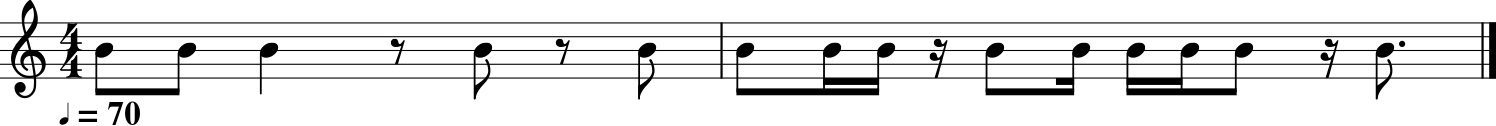

['S3', 'S1', 'S2', 'S2', 'S13', 'S9', 'S11', 'S3']
['S3', 'S1', 'S2', 'S2', 'S13', 'S9', 'S11', 'S3']
Total Q:  12
Total WNBD:  24
Total Pressing:  33.0
Total WNBD/Q 2.00


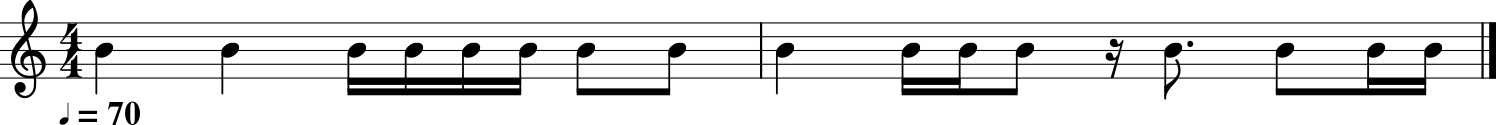

['S1', 'S1', 'S6', 'S3', 'S1', 'S11', 'S3', 'S13']
['S1', 'S1', 'S6', 'S3', 'S1', 'S11', 'S3', 'S13']
Total Q:  14
Total WNBD:  22
Total Pressing:  13.0
Total WNBD/Q 1.57


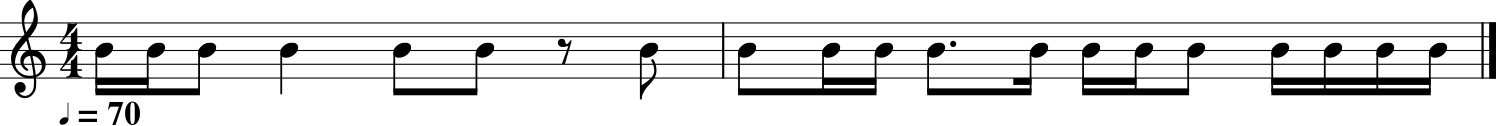

['S5', 'S1', 'S3', 'S2', 'S13', 'S7', 'S11', 'S14']
['S5', 'S1', 'S3', 'S2', 'S13', 'S7', 'S11', 'S14']
Total Q:  13
Total WNBD:  26
Total Pressing:  29.5
Total WNBD/Q 2.00


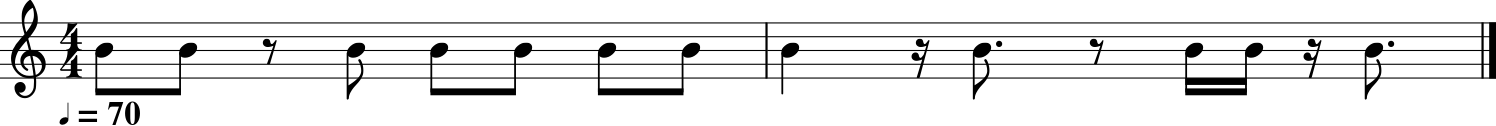

['S3', 'S2', 'S3', 'S3', 'S1', 'S3', 'S10', 'S3']
['S3', 'S2', 'S3', 'S3', 'S1', 'S3', 'S10', 'S3']
Total Q:  14
Total WNBD:  18
Total Pressing:  16.0
Total WNBD/Q 1.29


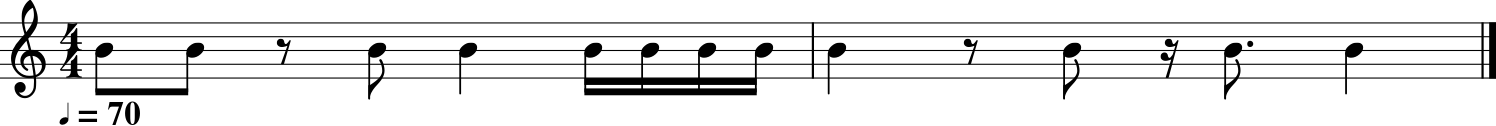

['S3', 'S2', 'S1', 'S6', 'S1', 'S2', 'S3', 'S1']
['S3', 'S2', 'S1', 'S6', 'S1', 'S2', 'S3', 'S1']
Total Q:  13
Total WNBD:  18
Total Pressing:  14.0
Total WNBD/Q 1.38


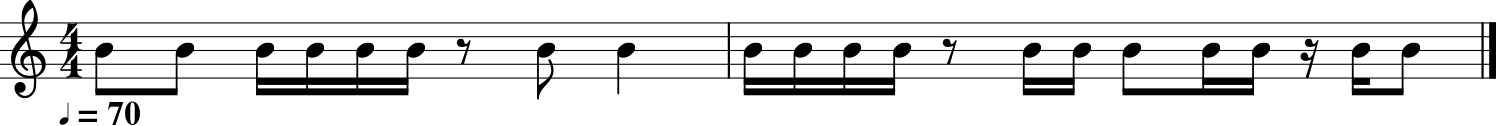

['S3', 'S6', 'S2', 'S1', 'S14', 'S10', 'S13', 'S8']
['S3', 'S6', 'S2', 'S1', 'S14', 'S10', 'S13', 'S8']
Total Q:  14
Total WNBD:  34
Total Pressing:  34.5
Total WNBD/Q 2.43


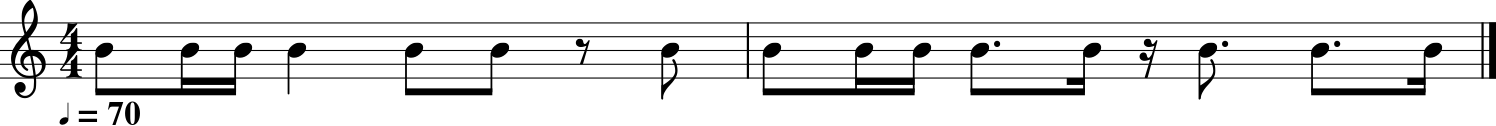

['S4', 'S1', 'S3', 'S2', 'S13', 'S7', 'S3', 'S7']
['S4', 'S1', 'S3', 'S2', 'S13', 'S7', 'S3', 'S7']
Total Q:  14
Total WNBD:  24
Total Pressing:  25.0
Total WNBD/Q 1.71


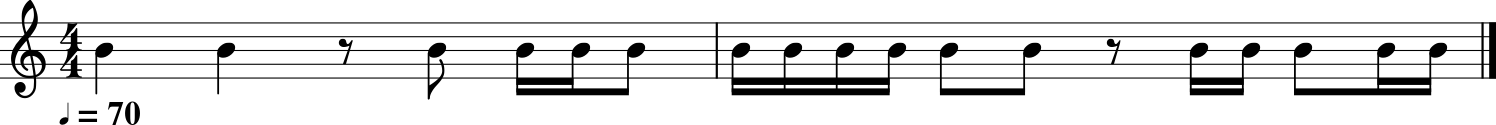

['S1', 'S1', 'S2', 'S5', 'S14', 'S6', 'S10', 'S13']
['S1', 'S1', 'S2', 'S5', 'S14', 'S6', 'S10', 'S13']
Total Q:  14
Total WNBD:  32
Total Pressing:  28.0
Total WNBD/Q 2.29


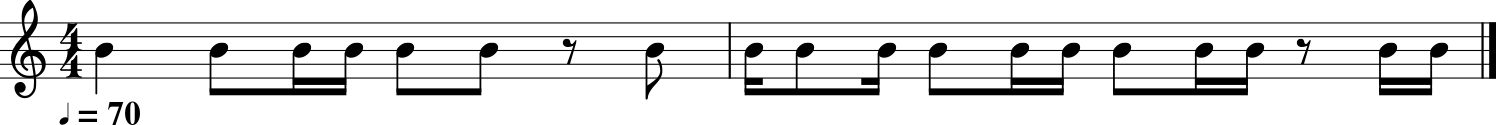

['S1', 'S4', 'S3', 'S2', 'S12', 'S13', 'S13', 'S10']
['S1', 'S4', 'S3', 'S2', 'S12', 'S13', 'S13', 'S10']
Total Q:  14
Total WNBD:  32
Total Pressing:  32.5
Total WNBD/Q 2.29


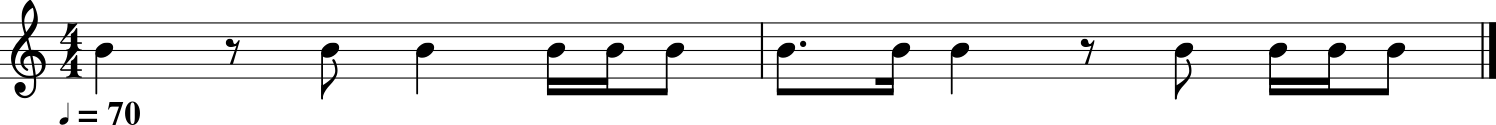

['S1', 'S2', 'S1', 'S5', 'S7', 'S1', 'S2', 'S11']
['S1', 'S2', 'S1', 'S5', 'S7', 'S1', 'S2', 'S11']
Total Q:  12
Total WNBD:  18
Total Pressing:  19.0
Total WNBD/Q 1.50


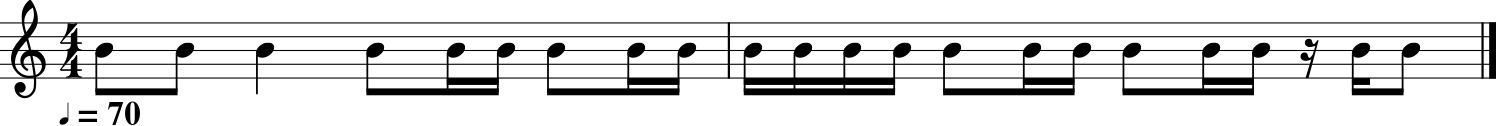

['S3', 'S1', 'S4', 'S4', 'S14', 'S13', 'S13', 'S8']
['S3', 'S1', 'S4', 'S4', 'S14', 'S13', 'S13', 'S8']
Total Q:  14
Total WNBD:  32
Total Pressing:  32.0
Total WNBD/Q 2.29


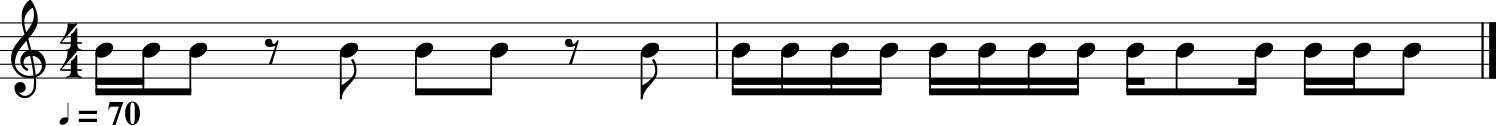

['S5', 'S2', 'S3', 'S2', 'S14', 'S14', 'S12', 'S11']
['S5', 'S2', 'S3', 'S2', 'S14', 'S14', 'S12', 'S11']
Total Q:  14
Total WNBD:  32
Total Pressing:  35.0
Total WNBD/Q 2.29


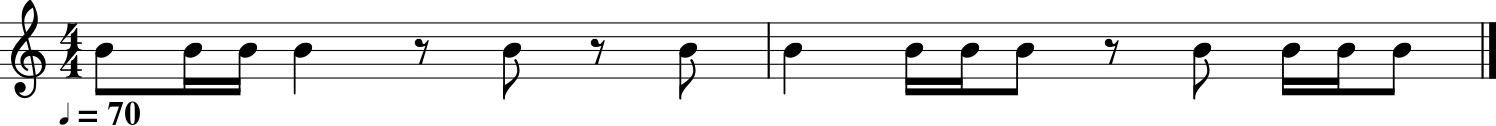

['S4', 'S1', 'S2', 'S2', 'S1', 'S11', 'S2', 'S11']
['S4', 'S1', 'S2', 'S2', 'S1', 'S11', 'S2', 'S11']
Total Q:  12
Total WNBD:  20
Total Pressing:  22.5
Total WNBD/Q 1.67


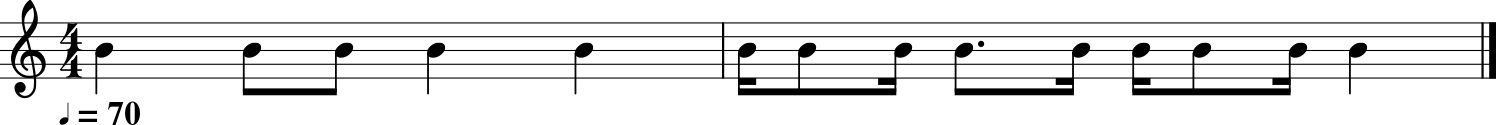

['S1', 'S3', 'S1', 'S1', 'S12', 'S7', 'S12', 'S1']
['S1', 'S3', 'S1', 'S1', 'S12', 'S7', 'S12', 'S1']
Total Q:  14
Total WNBD:  22
Total Pressing:  14.5
Total WNBD/Q 1.57


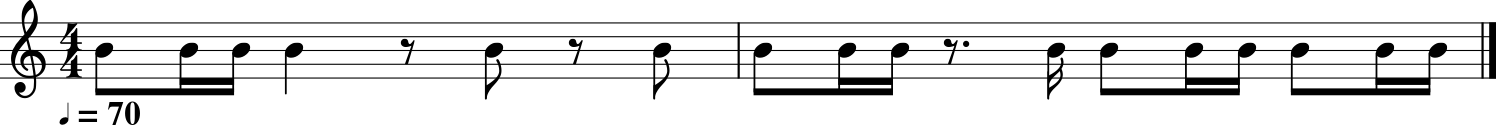

['S4', 'S1', 'S2', 'S2', 'S13', 'S4', 'S13', 'S13']
['S4', 'S1', 'S2', 'S2', 'S13', 'S4', 'S13', 'S13']
Total Q:  12
Total WNBD:  28
Total Pressing:  35.5
Total WNBD/Q 2.33


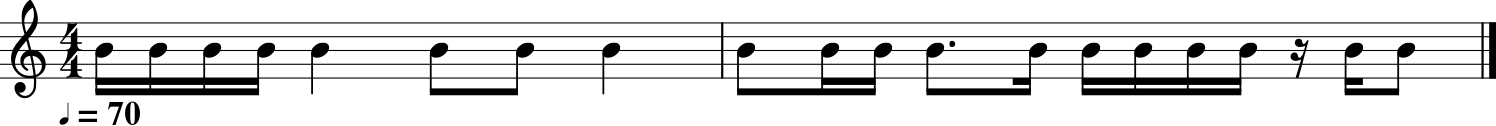

['S6', 'S1', 'S3', 'S1', 'S13', 'S7', 'S14', 'S8']
['S6', 'S1', 'S3', 'S1', 'S13', 'S7', 'S14', 'S8']
Total Q:  14
Total WNBD:  30
Total Pressing:  28.0
Total WNBD/Q 2.14


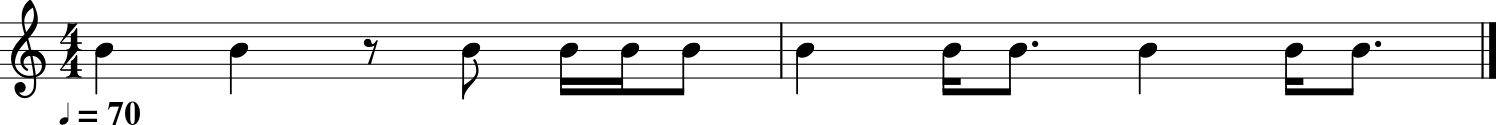

['S1', 'S1', 'S2', 'S5', 'S1', 'S5', 'S1', 'S5']
['S1', 'S1', 'S2', 'S5', 'S1', 'S5', 'S1', 'S5']
Total Q:  14
Total WNBD:  20
Total Pressing:  8.5
Total WNBD/Q 1.43


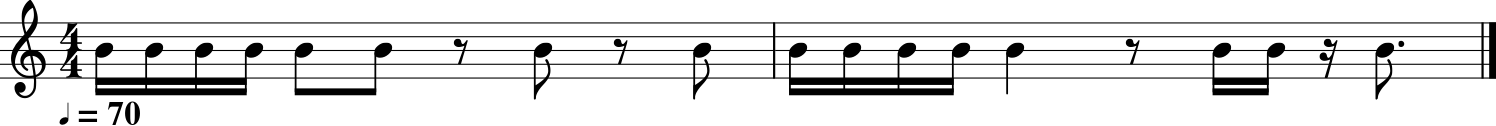

['S6', 'S3', 'S2', 'S2', 'S14', 'S1', 'S10', 'S3']
['S6', 'S3', 'S2', 'S2', 'S14', 'S1', 'S10', 'S3']
Total Q:  14
Total WNBD:  28
Total Pressing:  27.0
Total WNBD/Q 2.00


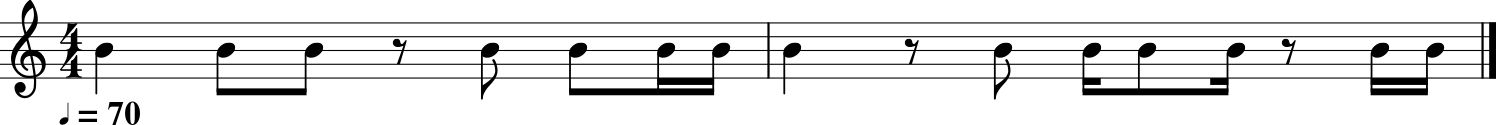

['S1', 'S3', 'S2', 'S4', 'S1', 'S2', 'S12', 'S10']
['S1', 'S3', 'S2', 'S4', 'S1', 'S2', 'S12', 'S10']
Total Q:  14
Total WNBD:  26
Total Pressing:  23.0
Total WNBD/Q 1.86


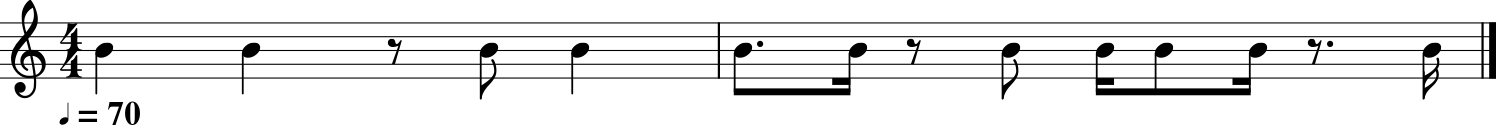

['S1', 'S1', 'S2', 'S1', 'S7', 'S2', 'S12', 'S4']
['S1', 'S1', 'S2', 'S1', 'S7', 'S2', 'S12', 'S4']
Total Q:  13
Total WNBD:  22
Total Pressing:  21.0
Total WNBD/Q 1.69


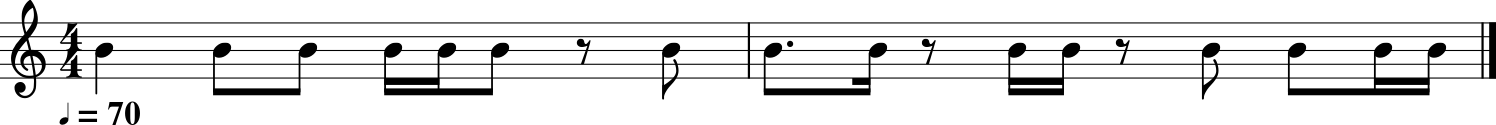

['S1', 'S3', 'S5', 'S2', 'S7', 'S10', 'S2', 'S13']
['S1', 'S3', 'S5', 'S2', 'S7', 'S10', 'S2', 'S13']
Total Q:  13
Total WNBD:  26
Total Pressing:  30.5
Total WNBD/Q 2.00


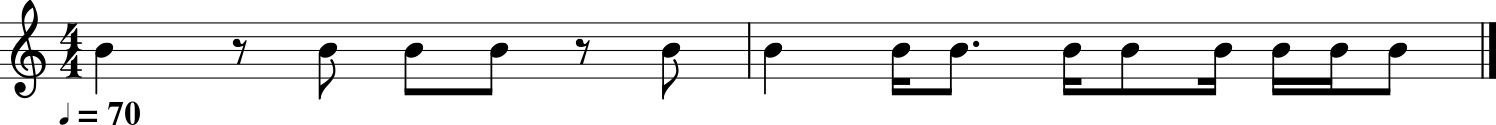

['S1', 'S2', 'S3', 'S2', 'S1', 'S5', 'S12', 'S11']
['S1', 'S2', 'S3', 'S2', 'S1', 'S5', 'S12', 'S11']
Total Q:  14
Total WNBD:  24
Total Pressing:  20.0
Total WNBD/Q 1.71


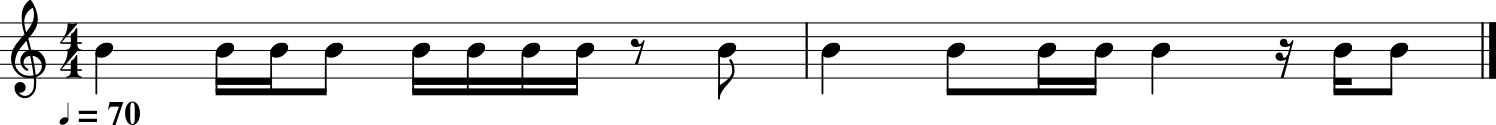

['S1', 'S5', 'S6', 'S2', 'S1', 'S13', 'S1', 'S8']
['S1', 'S5', 'S6', 'S2', 'S1', 'S13', 'S1', 'S8']
Total Q:  14
Total WNBD:  28
Total Pressing:  21.5
Total WNBD/Q 2.00


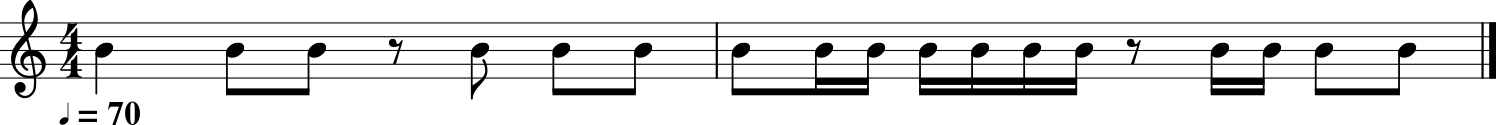

['S1', 'S3', 'S2', 'S3', 'S13', 'S14', 'S10', 'S6']
['S1', 'S3', 'S2', 'S3', 'S13', 'S14', 'S10', 'S6']
Total Q:  14
Total WNBD:  30
Total Pressing:  29.0
Total WNBD/Q 2.14


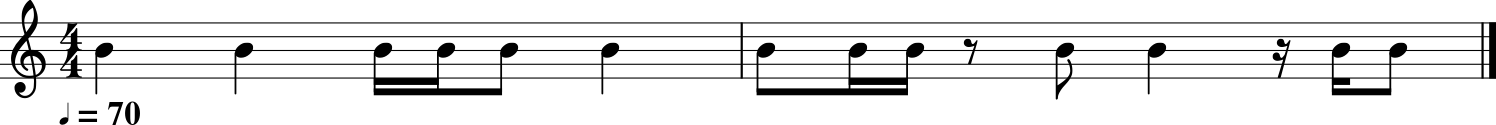

['S1', 'S1', 'S5', 'S1', 'S13', 'S2', 'S1', 'S8']
['S1', 'S1', 'S5', 'S1', 'S13', 'S2', 'S1', 'S8']
Total Q:  11
Total WNBD:  18
Total Pressing:  20.5
Total WNBD/Q 1.64


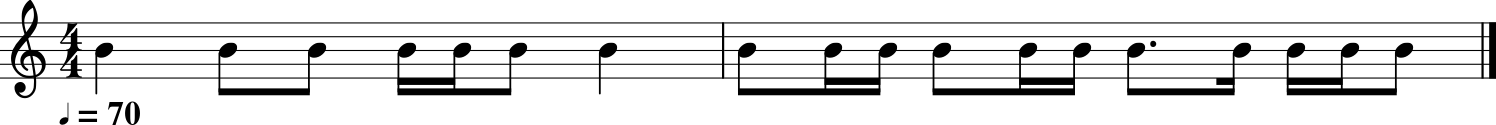

['S1', 'S3', 'S5', 'S1', 'S13', 'S13', 'S7', 'S11']
['S1', 'S3', 'S5', 'S1', 'S13', 'S13', 'S7', 'S11']
Total Q:  13
Total WNBD:  24
Total Pressing:  24.0
Total WNBD/Q 1.85


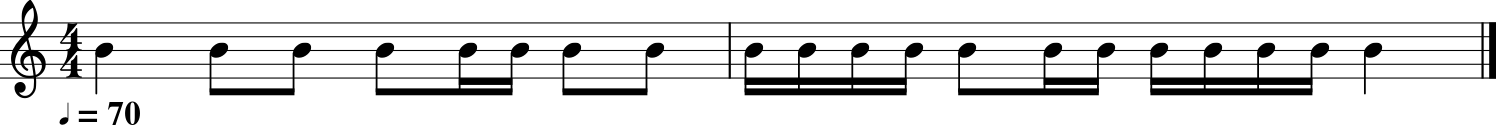

['S1', 'S3', 'S4', 'S3', 'S14', 'S13', 'S14', 'S1']
['S1', 'S3', 'S4', 'S3', 'S14', 'S13', 'S14', 'S1']
Total Q:  12
Total WNBD:  22
Total Pressing:  25.5
Total WNBD/Q 1.83


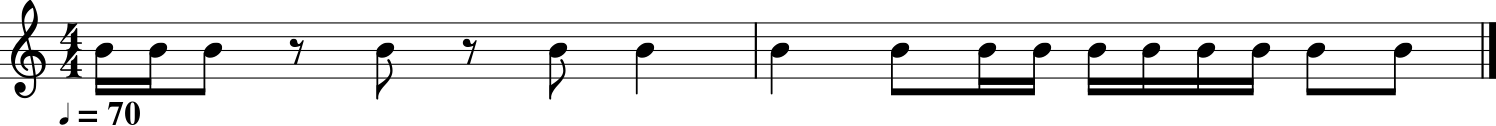

['S5', 'S2', 'S2', 'S1', 'S1', 'S13', 'S14', 'S6']
['S5', 'S2', 'S2', 'S1', 'S1', 'S13', 'S14', 'S6']
Total Q:  13
Total WNBD:  28
Total Pressing:  28.0
Total WNBD/Q 2.15


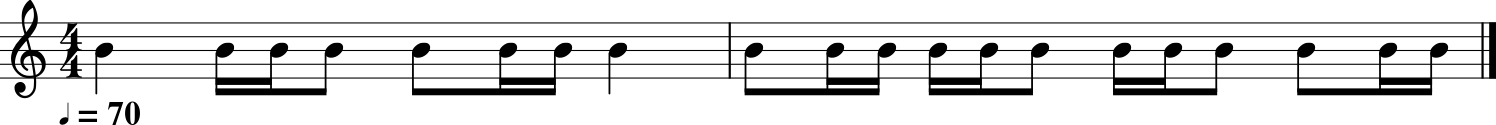

['S1', 'S5', 'S4', 'S1', 'S13', 'S11', 'S11', 'S13']
['S1', 'S5', 'S4', 'S1', 'S13', 'S11', 'S11', 'S13']
Total Q:  14
Total WNBD:  28
Total Pressing:  22.0
Total WNBD/Q 2.00


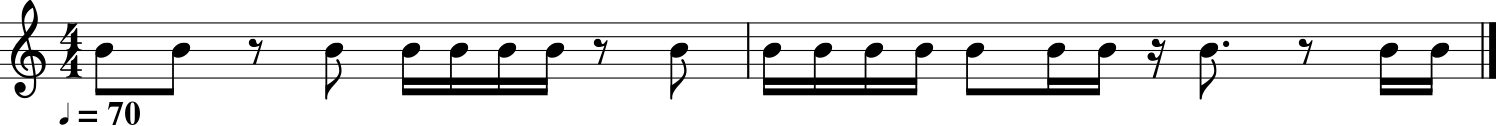

['S3', 'S2', 'S6', 'S2', 'S14', 'S13', 'S3', 'S10']
['S3', 'S2', 'S6', 'S2', 'S14', 'S13', 'S3', 'S10']
Total Q:  14
Total WNBD:  32
Total Pressing:  34.5
Total WNBD/Q 2.29


''

In [42]:
# Mixed

olcu_sayisi = 2
zaman_isareti = 4

my_seviye = 15
my_opsiyon = 2
req_tempo = 70

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 15)

pdf.cell(200, 10, txt = f"Seviye 1.5 , Opsiyon: {my_opsiyon}", ln = 1, align = 'C')

ritim_lists = []
ln = 1
number_of_samples = 30
for i in range(number_of_samples):
    
    ritim_list = calculateritmseviyemixed(my_opsiyon)
    s = writescoremixed(ritim_list, my_opsiyon, req_tempo)
    
    ritim_lists.append(ritim_list)
    
    
  
    print(ritim_list)
   
    
    
    fname = f"Ritm_seviye_1.5_opsiyon{my_opsiyon}_{i:0=2d}.pdf"
    s.write("musicxml.pdf", fp=fname) 
    sToStr = ' '.join([str(elem) for elem in ritim_list])
    table_Q, table_WNBD, table_Pressing, table_WNBDQratio  = table_scores(ritim_list, seviye=my_seviye, opsiyon=my_opsiyon)
    if (my_opsiyon==1):
      sToStr = sToStr + "   " + str(table_Q) + "   "  + str(table_WNBD) + "   " + str("{:.2f}".format(table_WNBD/table_Q)) 
    elif(my_opsiyon==2):
      sToStr = sToStr + "   " + str(table_Q) + "   "  + str(table_WNBD)  + "   " + str("{:.2f}".format(table_WNBD/table_Q))  +  "   " + str("{:.2f}".format(table_Pressing))

    ln +=1
    pdf.cell(200, 10, txt = sToStr, ln = ln, align = 'L')
    
    mf = midi.translate.streamToMidiFile(s)
    #mf.ticksPerQuarterNote = 512
    midifile_name = f"midi_seviye_1.5_opsiyon{my_opsiyon}_{i:0=2d}.mid"
    mf.open(midifile_name, 'wb')
    mf.write()
    mf.close()
    
    #my_image = Image(str(s.write('lily.png'))) 
    #display(my_image)
    #pngfile_name = f"png_seviye_1.5_opsiyon{opsiyon}_{i:0=2d}.png"
    
    #with open(pngfile_name, 'wb') as f:
    #    f.write(my_image.data)
    
fname_all = f"RitmAll_Seviye_1.5_Opsiyon_{my_opsiyon}_Listesi.pdf"   
pdf.output(fname_all)  